<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Chennai_House_Price_Prediction_Major_Project_D18_batch_Ganga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?




---


#Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.




---





# Data Description

The description for all the columns in `Chennai House Price Prediction Dataset` is provided below:


|Columns|Description|
|-|-|
|`PRT_ID`|Property ID|
|||
|`AREA`|The Area in which Property is located|
|||
|`INT_SQFT`|The interior Sq.ft of the Property|
|||
|`DATE_SALE`|The date at which the property was Sold|
|||
|`DIST_MAINROAD`|Distance of the property from Mainroad|
|||
|`N_BEDROOM`|Number of Bedrooms|
|||
|`N_BATHROOM`|Number of Bathrooms|
|||
|`N_ROOM`|Number of Rooms|
|||
|`SALE_COND`|The sale condition of the Property(Normal, Abnormal, Adjland, Family, Partial)|
|||
|`PARK_FACIL`|Availability of Parking Facility near the property(Yes/No)|
|||
|`DATE_BUILD`|The date at which the property was Build|
|||
|`BUILDTYPE`|The type of the Building(House, Commercial, Others)|
|||
|`UTILITY_AVAIL`|The available utilities (AllPub: All public Utilities, NoSewr: Electricity, Gas & Water, NoSewa:Electricity &Gas only, ELO: Electricity Only) |
|||
|`STREET`|The condition/type of the street near the Property(Gravel, Paved, No Access)|
|||
|`MZZONE`|The zone in which the Property is located( A: Agriculture, C: Commercial, I: Industrial, RH: Residential High Density, RL: Residential Low Density, RM: Residential Medium Density )|
|||
|`QS_ROOMS`|Quality score assigned for Rooms based on buyer reviews|
|||
|`QS_BATHROOM`|Quality score assigned for Bathrooms based on buyer reviews|
|||
|`QS_BEDROOM`|Quality score assigned for Bedrooms based on buyer reviews|
|||
|`QS_OVERALL`|Overall Quality score assigned for the property based on buyer reviews|
|||
|`REG_FEE`|The Registration Fees of the property|
|||
|`COMMIS`|The commission paid to the broker on successful sales of the property|
|||
|`SALES_PRICE`|The Sales Price of the Property|

---

###Importing modules

In [1423]:
# Importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score, mean_absolute_error,
                             mean_squared_error,
                             mean_squared_log_error)
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [1424]:
# Loading the dataset
path = "/content/train-chennai-sale.csv"
df = pd.read_csv(path)
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [1425]:
# Number of rows and columns in the dataframe.
df.shape

(7109, 22)

In [1426]:
# Description of the Dataset.
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

`Inferences:`
* There are interior sq.ft of the houses are ranging from 500 to 2500 in the dataset.
* Minimum and maximum number of Rooms available are 2 and 6 respectively.
* Minimum and maximum number of Bedrooms available are 1 and 4 respectively.
* Minimum and maximum number of Bathrooms available are 1 and 2 respectively.
* The commission obatained on selling the houses vary from a minimum value of 5055 to a maximum of 495405 units.
* Minimum and maximum Sales price of the houses range from a minimum of 2.156875e+06 to a maximum of 2.366734e+07.

### Treating Missing Values

In [1427]:
# Checking for missing values.
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

There are missing values in `N_BEDROOM`, `N_BATHROOM`, `QS_OVERALL` columns.

In [1428]:
# Percentage of missing values in N_BEDROOM, N_BATHROOM, QS_OVERALL columns.
print(f"Percentage of missing values in 'N_BEDROOM' Column is {(df.N_BEDROOM.isnull().sum()*100)/df.shape[0]:.3f}%")
print(f"Percentage of missing values in 'N_BATHROOM' Column is {(df.N_BATHROOM.isnull().sum()*100)/df.shape[0]:.3f}%")
print(f"Percentage of missing values in 'QS_OVERALL' Column is {(df.QS_OVERALL.isnull().sum()*100)/df.shape[0]:.3f}%")

Percentage of missing values in 'N_BEDROOM' Column is 0.014%
Percentage of missing values in 'N_BATHROOM' Column is 0.070%
Percentage of missing values in 'QS_OVERALL' Column is 0.675%


As the Percentage of missing values in `N_BEDROOM`, `N_BATHROOM`, `QS_OVERALL` columns are very less, we will not remove these columns. But instead we will replace the missing values in these columns with some apprpriate values.

In [1429]:
# Checking the datatype of the columns where there are missing values.
print(df.dtypes[['N_BEDROOM', 'N_BATHROOM', 'QS_OVERALL']])

N_BEDROOM     float64
N_BATHROOM    float64
QS_OVERALL    float64
dtype: object


The number of Bedrooms('N_BEDROOM') and Bathrooms('N_BATHROOM') should be of int type. Also, as they are discrete values, we will replace them with their mode values.

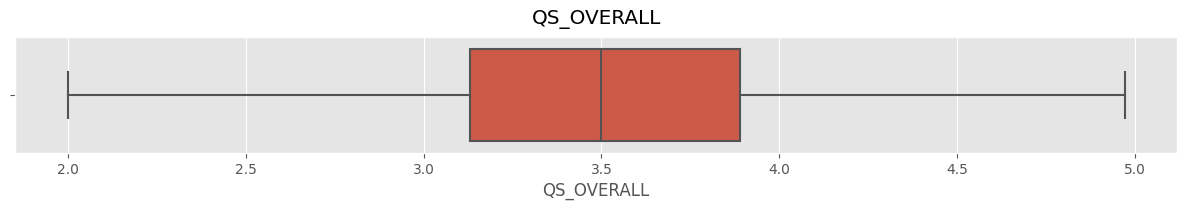

In [1430]:
# Boxplot for 'QS_OVERALL' column.
plt.figure(figsize=(15,1.5))
plt.title("QS_OVERALL",va='bottom')
sns.boxplot(df.QS_OVERALL)
plt.show()

`Inference From the above graph:`
As there are no outliers in the "QS_OVERALL" column, we will replace the missing values in "QS_OVERALL" column with it's mean value.

In [1431]:
# Treating the missing values.
df = df.fillna({"N_BEDROOM": df["N_BEDROOM"].mode()[0],# series.mode() results in another pandas series.
                "N_BATHROOM": df["N_BATHROOM"].mode()[0], 
                "QS_OVERALL": df["QS_OVERALL"].mean()})

In [1432]:
# Converting the datatypes of 'N_BEDROOM' and 'N_BATHROOM' columns into integer type.
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [1433]:
# Getting information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### Converting DateTime values into DateTime Objects

In [1434]:
# Convert the 'DATE_SALE' and 'DATE_BUILD' columns to datetime format.
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']= pd.to_datetime(df['DATE_BUILD'])

# Checking the types of both columns
print(df.dtypes[['DATE_SALE','DATE_BUILD']])

DATE_SALE     datetime64[ns]
DATE_BUILD    datetime64[ns]
dtype: object


### Adding new column--> "BUILD_AGE"

We will add an additional column into the dataframe specifying the age of the building/Building Lifetime.
* Age of the building = Date of Sale - Date at which the building was built

In [1435]:
# Output will be a pandas Series with DateTime objects as values.
building_age = df['DATE_SALE'] - df['DATE_BUILD']
building_age

0      16031 days
1       4015 days
2       7152 days
3       8030 days
4      10802 days
          ...    
7104   17942 days
7105    3196 days
7106   10455 days
7107   11443 days
7108   16060 days
Length: 7109, dtype: timedelta64[ns]

In [1436]:
# To convert DateTime objects in the Series to numerical(float) values.
building_age = building_age/np.timedelta64(1, 'Y') # difference w.r.t years
print(f"Data type of values in the building_age series : {building_age.dtype}\n")

# For better analysis let's round off the values and convert them into integer.
building_age = round(building_age).astype("int")


Data type of values in the building_age series : float64



In [1437]:
# Inserting the new column into the dataframe(as 2nd last column).
df.insert(loc=df.shape[1]-1, column='BUILD_AGE', value=building_age)
# Values in the Age of the Building column
df['BUILD_AGE'].head()

0    44
1    11
2    20
3    22
4    30
Name: BUILD_AGE, dtype: int64

In [1438]:
# Checking the columns present in the Dataframe df.
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'BUILD_AGE', 'SALES_PRICE'],
      dtype='object')

### Dropping Irrelevant Columns

Dropping `PRT_ID` ,`REG_FEE` and `COMMIS` as they are *NOT* relevant for price prediction.

In [1439]:
# Dropping unnecessary columns.
df.drop(columns=['PRT_ID', 'REG_FEE', 'COMMIS'], inplace=True)

In [1440]:
# Checking the columns.
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'BUILD_AGE', 'SALES_PRICE'],
      dtype='object')

In [1441]:
# Extracting the Catogorical columns only (Before Spelling Correction).
df_cat1 = df.select_dtypes(include=["object"])
print(f"Number of Categorical columns = {df_cat1.shape[1]}\n")
print("The Categorical columns are as follows:\n", list(df_cat1.columns))

Number of Categorical columns = 7

The Categorical columns are as follows:
 ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


### Spelling Corrections of Values in the Categorical columns

In [1442]:
# The number of occurrences of each value in the 'AREA' column.
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

Some of the areas mentioned above have different spellings, but they are the same. 
* Chrompet, Chrompt, Chrmpet, Chormpet are all the same.
* Karapakkam and Karapakam are the same.
* KK Nagar and KKNagar are the same.
* Velachery and Velchery are the same.
* Anna Nagar, Ana Nagar, Ann Nagar are the same.
* Adyar and Adyr are the same.
* T Nagar and TNagar are the same.





In [1443]:
# Correcting the spelling mistakes in 'AREA' Column.
df['AREA'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet", "Chormpet":"Chrompet"}, inplace = True)
df['AREA'].replace("Karapakam","Karapakkam", inplace = True)
df['AREA'].replace("KKNagar","KK Nagar", inplace = True)
df['AREA'].replace("Velchery","Velachery", inplace = True)
df['AREA'].replace({"Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar"}, inplace = True)
df['AREA'].replace("Adyr","Adyar", inplace = True)
df['AREA'].replace("TNagar","T Nagar", inplace = True)

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64 



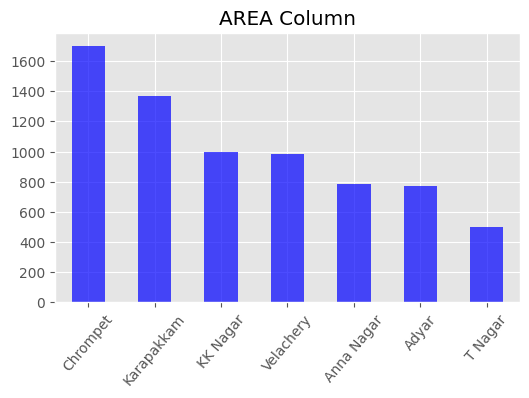

In [1444]:
# The number of occurrences of each value in the 'AREA' column after spelling correction.
print(df.AREA.value_counts(),"\n")
# Barplot showing the number of occurrences of each value in the 'AREA' column.
plt.figure(figsize=(6,3.5))
plt.title("AREA Column")
df.AREA.value_counts().plot(kind='bar', color="blue", alpha=0.7)
plt.xticks(rotation=50)
plt.show()

`Inference From the above graph:`
* In 'AREA' Column, Chrompet has highest number of observations,i.e., maximum number of houses are at Chrompet and minimum number of houses are at T Nagar.

In [1445]:
# The number of occurrences of each value in the 'SALE_COND' column.
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

There are spelling mistakes in 'SALE_COND' column as well.
* AdjLand and Adj Land are the same.
* Partial, Partiall, PartiaLl are the same
* AbNormal and Ab Normal are the same.      


AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64 



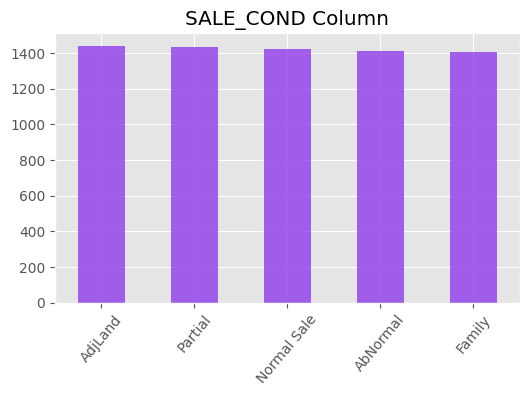

In [1446]:
# Correcting the spelling mistakes in 'SALE_COND' Column.
df['SALE_COND'].replace({"Partiall":"Partial","PartiaLl":"Partial"}, inplace = True)
df['SALE_COND'].replace("Adj Land","AdjLand", inplace = True)
df['SALE_COND'].replace("Ab Normal","AbNormal", inplace = True)

# The number of occurrences of each value in the 'SALE_COND' column after spelling correction.
print(df['SALE_COND'].value_counts(),"\n")

# Barplot showing the number of occurrences of each value in the 'SALE_COND' column.
plt.figure(figsize=(6,3.5))
plt.title("SALE_COND Column")
df['SALE_COND'].value_counts().plot(kind='bar', color='#8e3beb', alpha=0.8)
plt.xticks(rotation=50)
plt.show()

`Inference From the above graph:`
* In 'SALE_COND' Column, AdjLand has highest number of observations,i.e., maximum number of houses have sales condition as AdjLand  and least number of houses have sales condition as Family.

* The number of occurrences of each value in the 'SALE_COND' column do not vary too much.

In [1447]:
# The number of occurrences of each value in the 'PARK_FACIL' column.
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

No and Noo are the same in 'PARK_FACIL' Column.

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64 



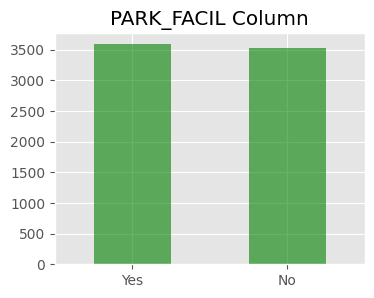

In [1448]:
# Correcting the spelling of Noo in 'PARK_FACIL' Column.
df['PARK_FACIL'].replace("Noo","No", inplace = True)

# The number of occurrences of each value in the 'PARK_FACIL' column after spelling correction.
print(df['PARK_FACIL'].value_counts(),"\n")

# Barplot showing the number of occurrences of each value in the 'PARK_FACIL' column.
plt.figure(figsize=(4,3))
plt.title("PARK_FACIL Column")
df['PARK_FACIL'].value_counts().plot(kind='bar', color="g", alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

`Inference From the above graph:`

* The number of occurrences of each value(*Yes* and *No*) in the Parking Facility('PARK_FACIL' column) do not vary too much.They have almost equal distribution of values.

In [1449]:
# The number of occurrences of each value in the 'BUILDTYPE' column.
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

There are spelling mistakes in 'BUILDTYPE' column as well.
* Commercial and Comercial are the same.
* Others and Other are the same.

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64 



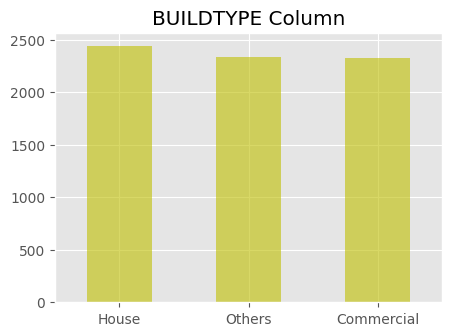

In [1450]:
# Correcting the spelling mistakes in 'BUILDTYPE' Column.
df['BUILDTYPE'].replace("Comercial","Commercial", inplace = True)
df['BUILDTYPE'].replace("Other","Others", inplace = True)

# The number of occurrences of each value in the 'BUILDTYPE' column after spelling correction.
print(df['BUILDTYPE'].value_counts(),"\n")

# Barplot showing the number of occurrences of each value in the 'BUILDTYPE' column.
plt.figure(figsize=(5,3.5))
plt.title("BUILDTYPE Column")
df['BUILDTYPE'].value_counts().plot(kind='bar', color= "y", alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

`Inference From the above graph:`

* The maximum number of observations are coming under "House" and minimum number of observations are coming under "Commercial".

* The number of occurrences of each value(*House*,*Others* and *Commercial*) in the Building Type('BUILDTYPE') column do not vary too much.

In [1451]:
# The number of occurrences of each value in the 'UTILITY_AVAIL' column.
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

There are spelling mistakes in 'UTILITY_AVAIL' column as well.
* AllPub and All Pub are the same.




AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64 



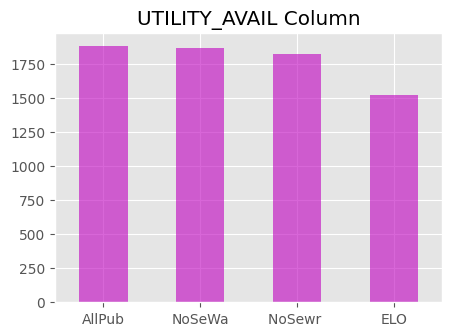

In [1452]:
# Correcting the spelling mistakes in 'BUILDTYPE' Column.
df['UTILITY_AVAIL'].replace("All Pub","AllPub", inplace = True)

# The number of occurrences of each value in the 'UTILITY_AVAIL' column after spelling correction.
print(df['UTILITY_AVAIL'].value_counts(),"\n")

# Barplot showing the number of occurrences of each value in the 'UTILITY_AVAIL' column.
plt.figure(figsize=(5,3.5))
plt.title("UTILITY_AVAIL Column")
df['UTILITY_AVAIL'].value_counts().plot(kind='bar', color ="m", alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

`Inference From the above graph:`

* The maximum number of observations are coming under "AllPub" and minimum number of observations are coming under "ELO".

* The number of occurrences/observations under *AllPub*,*NoSeWa* and *NoSewr* are almost the same with only a little difference.

In [1453]:
# The number of occurrences of each value in the 'STREET' column.
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

There are spelling mistakes in 'STREET' column as well.
* Paved and Pavd are the same.
* No Access and NoAccess are the same.

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64 



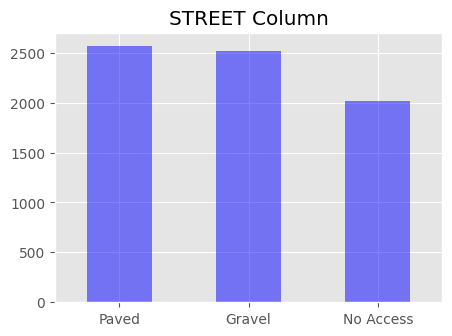

In [1454]:
# Correcting the spelling mistakes in 'STREET' Column.
df['STREET'].replace("Pavd","Paved", inplace = True)
df['STREET'].replace("NoAccess","No Access", inplace = True)

# The number of occurrences of each value in the 'STREET' column after spelling correction.
print(df['STREET'].value_counts(),"\n")

# Barplot showing the number of occurrences of each value in the 'STREET' column.
plt.figure(figsize=(5,3.5))
plt.title("STREET Column")
df['STREET'].value_counts().plot(kind='bar', color="b", alpha=0.5)
plt.xticks(rotation='horizontal')
plt.show()



`Inference From the above graph:`

* The maximum number of observations are coming under "Paved" and minimum number of observations are coming under "No Access".

* The number of occurrences/observations under *Paved* and *Gravel* are almost the same with only a little difference.

In [1455]:
# The number of occurrences of each value in the 'MZZONE' column.
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

There seems to be no spelling mistakes in the 'MZZONE' column. 

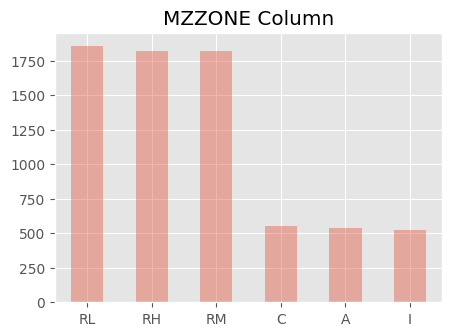

In [1456]:
# Barplot showing the number of occurrences of each value in the 'MZZONE' column.
plt.figure(figsize=(5,3.5))
plt.title("MZZONE Column")
df['MZZONE'].value_counts().plot(kind='bar', alpha=0.4)
plt.xticks(rotation='horizontal')
plt.show()

`Inference From the above graph:`

* The maximum number of observations are coming under "RL" and minimum number of observations are coming under "I".

* The number of occurrences/observations under *RL*,*RH* and *RM* are almost the same (around 1800) with only a little difference between them. Similarly,number of occurrences/observations under *C*,*A* and *I* are almost the same (around 500) with only a little difference between them. 

### Categorical Columns

In [1457]:
# Extracting the Catogorical columns only (After Spelling Correction).
df_cat2 = df.select_dtypes(include=["object"])
print(f"Number of Categorical columns = {df_cat2.shape[1]}\n")
df_cat2.head()

Number of Categorical columns = 7



AREA SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE
0  Karapakkam  AbNormal        Yes  Commercial        AllPub   Paved      A
1  Anna Nagar  AbNormal         No  Commercial        AllPub  Gravel     RH
2       Adyar  AbNormal        Yes  Commercial           ELO  Gravel     RL
3   Velachery    Family         No      Others       NoSewr    Paved      I
4  Karapakkam  AbNormal        Yes      Others        AllPub  Gravel      C

### Categorical columns v/s Price column(Bar plots)


In [1458]:
# Grouping w.r.t 'AREA' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_area=df.groupby(["AREA"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_area

AREA   SALES_PRICE
4  Karapakkam  7.340100e+06
0       Adyar  9.185668e+06
2    Chrompet  1.001381e+07
6   Velachery  1.104735e+07
3    KK Nagar  1.269623e+07
1  Anna Nagar  1.516820e+07
5     T Nagar  1.561674e+07

We are sorting the values and visualizing them with the help of bar graphs so that we can determine if there is a linear relationship between the categorical feature considered and our target variable(Sales Price).

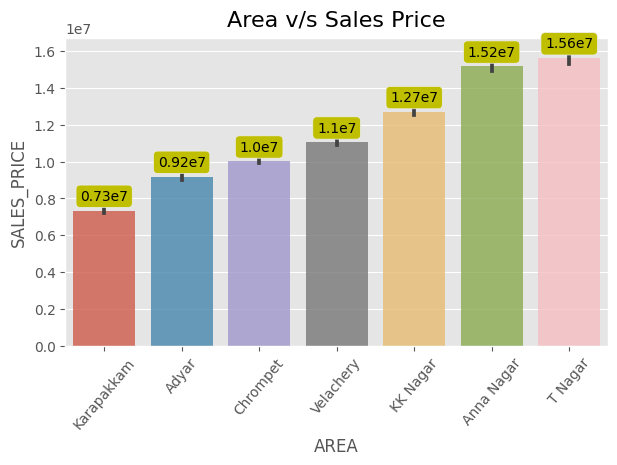

In [1459]:
# Barplot between Area and Sales Price.
plt.figure(figsize=(7,4))
plt.title("Area v/s Sales Price", fontsize=16, va='bottom')
# By default mean values will be plotted when sns.barplot() is used.
br1=sns.barplot(x = "AREA", y = "SALES_PRICE", data=df,
                order=result_area["AREA"], alpha=0.8)
for p in br1.patches:
  br1.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.4*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="y"))
plt.xticks(rotation=50)
plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) in T Nagar is the highest and the average sales price of observations(houses) in Karapakkam is the lowest.
* There is almost a steady linear increase in Sales Price observed w.r.t the values in 'AREA' Column. This shows that there is a linear relationship between 'AREA'(Feature) and 'SALES_PRICE'(Target) Columns.
* Due to the above reason, we will do label encoding for 'AREA' column.

In [1460]:
# Grouping w.r.t 'SALE_COND' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_sale_cond=df.groupby(["SALE_COND"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_sale_cond

SALE_COND   SALES_PRICE
4      Partial  1.061637e+07
2       Family  1.073642e+07
0     AbNormal  1.091463e+07
3  Normal Sale  1.099418e+07
1      AdjLand  1.120931e+07

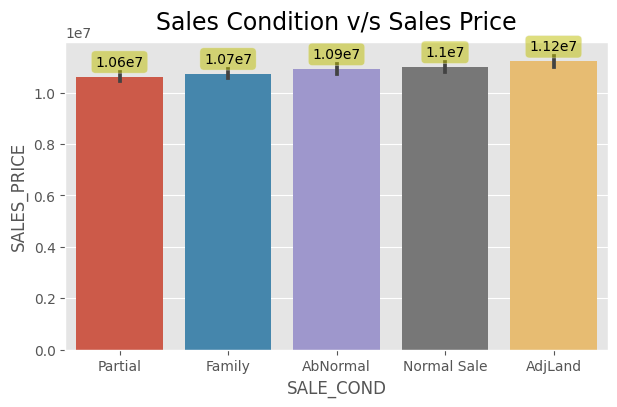

In [1461]:
# Barplot between Sales Condition and Sales Price.
plt.figure(figsize=(7,4))
plt.title("Sales Condition v/s Sales Price",  fontsize=17, va='bottom')
br2=sns.barplot(x = "SALE_COND", y = "SALES_PRICE", data=df, order=result_sale_cond['SALE_COND'])
for p in br2.patches:
  br2.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="y", alpha=0.5))

plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) with 'AdjLand' as Sales Condition is the highest and average sales price of observations(houses) with 'Partial' as Sales Condition is the lowest.
* There is almost a small but steady linear increase in the average sales price observed w.r.t the values in 'SALE_COND' Column. This shows that there is a slight linear relationship between 'SALE_COND'(Feature) and 'SALES_PRICE'(Target) Columns.
* Due to the above reason, we will do label encoding for 'SALE_COND' column.

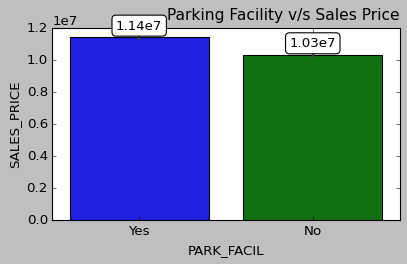

In [1462]:
# Barplot between Parking Facility and Sales Price(SP).
plt.style.use('classic')
plt.figure(figsize=(5.6,3))
plt.title("Parking Facility v/s Sales Price",  fontsize=14, loc="right", va='bottom')
br3=sns.barplot(x = "PARK_FACIL", y = "SALES_PRICE", data=df)
for p in br3.patches:
  br3.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', bbox=dict(boxstyle="round", fc="w"))

plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) with parking facility is more compared to observations(houses) with NO parking facility.
* As they are binary Categorical values, we will do label-encoding.

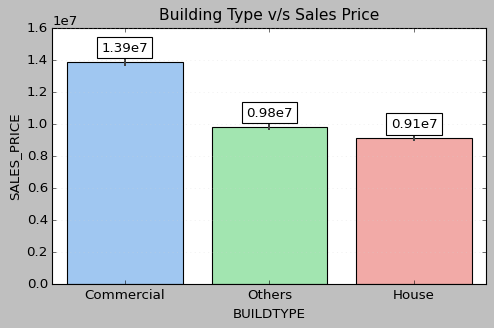

In [1463]:
# Barplot between Building Type and Sales Price(SP).
plt.style.use('seaborn-pastel')
plt.figure(figsize=(7,4))
plt.title("Building Type v/s Sales Price",  fontsize=14, va='bottom')
br4=sns.barplot(x = "BUILDTYPE", y = "SALES_PRICE", data=df)
for p in br4.patches:
  br4.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.5*10**6),
              ha='center', va='bottom', bbox=dict(fc="w"))
plt.grid(True,axis="y", color="lightgrey",alpha=0.5)
plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) with 'Commercial' as Building Type is the highest and average sales price of observations(houses) with 'House' as Building Type is the least.
* There is some relationship between the Building Type and Prices of the house. But this relationship is not linear in nature. As the plot does not indicate any linear relationship between the sales price and Building type, we will do one-hot encoding for 'BUILDTYPE' Column.

In [1464]:
# Grouping w.r.t 'UTILITY_AVAIL' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_utility_avail=df.groupby(["UTILITY_AVAIL"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_utility_avail

UTILITY_AVAIL   SALES_PRICE
1           ELO  1.046941e+07
2        NoSeWa  1.089308e+07
3       NoSewr   1.092576e+07
0        AllPub  1.121002e+07

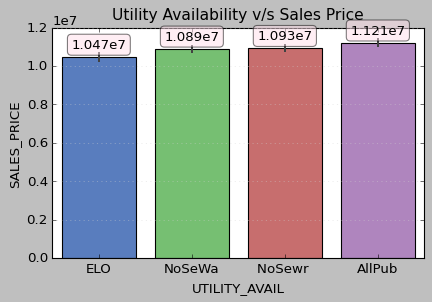

In [1465]:
# Barplot between Utility Availability and Sales Price(SP).
plt.style.use('seaborn-muted')
plt.figure(figsize=(6,3.6))
plt.title("Utility Availability v/s Sales Price",  fontsize=14, va='bottom')
br5=sns.barplot(x = "UTILITY_AVAIL", y = "SALES_PRICE", data=df, order=result_utility_avail["UTILITY_AVAIL"])
for p in br5.patches:
  br5.annotate(str(round(p.get_height()/10**7,3))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom', 
              bbox=dict(boxstyle="round", fc="#ffdeea", alpha=0.5))
plt.grid(True,axis="y", color="lightgrey",alpha=0.7)
plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) with 'AllPub'  is the highest and average sales price of observations(houses) with 'ELO' is the lowest.
* There is almost a small but steady linear increase in the average sales price observed w.r.t the values in 'UTILITY_AVAIL' Column. This shows that there is a slight linear relationship between 'UTILITY_AVAIL'(Feature) and 'SALES_PRICE'(Target) Columns.
* Due to the above reason, we will do label encoding for 'UTILITY_AVAIL' column.

In [1466]:
# Grouping w.r.t 'STREET' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_street=df.groupby(["STREET"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_street

STREET   SALES_PRICE
1  No Access  1.000074e+07
2      Paved  1.105754e+07
0     Gravel  1.144462e+07

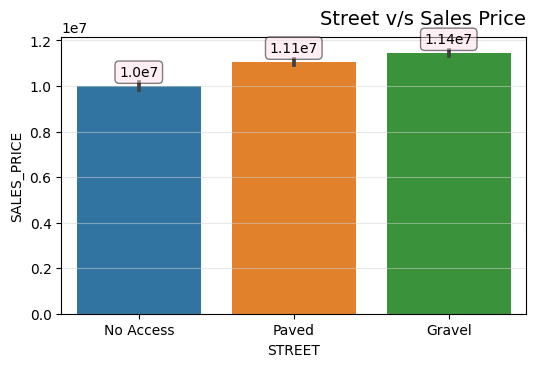

In [1467]:
# Barplot between Street and Sales Price(SP).
plt.style.use('default')
plt.figure(figsize=(6,3.6))
plt.title("Street v/s Sales Price",  fontsize=14, loc="right", va='bottom')
br6=sns.barplot(x = "STREET", y = "SALES_PRICE", data=df, order=result_street["STREET"])
for p in br6.patches:
  br6.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="#ffdeea",alpha = 0.5))
plt.grid(True,axis="y", color="lightgrey",alpha=0.5)
plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) under 'Gravel'  is the highest and average sales price of observations(houses) under 'No Access' is the lowest.
* There is a slight and steady linear increase in the average sales price observed w.r.t the values in 'STREET' Column. This shows that there is some kind of linear relationship between 'STREET'(Feature) and 'SALES_PRICE'(Target) Columns.
* Due to the above reason, we will do label encoding for 'STREET' column.

In [1468]:
# Grouping w.r.t 'MZZONE' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_zone=df.groupby(["MZZONE"])["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
result_zone

MZZONE   SALES_PRICE
0      A  7.292591e+06
1      C  8.052270e+06
2      I  8.738633e+06
3     RH  1.103997e+07
4     RL  1.176576e+07
5     RM  1.240707e+07

Here, 
* A --> Agriculture
* C --> Commercial
* I --> Industrial
* RH --> Residential High density
* RL --> Residential Low density
* RM --> Residential Medium density


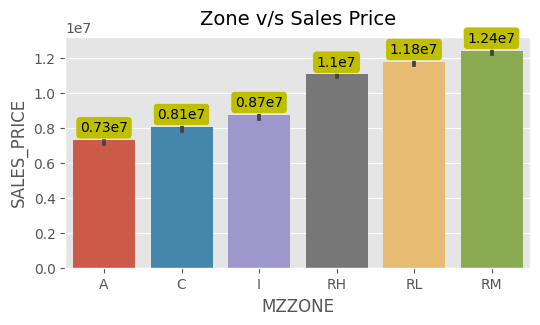

In [1469]:
# Barplot between Zones and Sales Price(SP).
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.title("Zone v/s Sales Price",  fontsize=14, va='bottom')
br7=sns.barplot(x = 'MZZONE', y = "SALES_PRICE", data=df, order=result_zone['MZZONE'])
for p in br7.patches:
  br7.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y"))
plt.show()

`Inference From the above graph:`
* The average sales price of observations(houses) under 'Residential Medium density-RM' is the highest and average sales price of observations(houses) under 'Agriculture-A' is the lowest in 'MZZONE' Column.
* There is almost a steady linear increase in the average sales price observed w.r.t the values in 'MZZONE' Column in the 1st and 2nd section of the graph. Although the sales price of houses under 'A','C','I' zones and the sales price of houses under 'RH','RL','RM' zones are steadily increasing, there is a jump in the average sales price of houses under 'I' to 'RH' zone. 
* This shows that there might be some relationship between the 'MZZONE' & 'SALES_PRICE' Columns, but it is not purely a linear relationship.
* Due to the above reason, we will do one-hot encoding for 'MZZONE' column.

###Pie charts for categorical columns

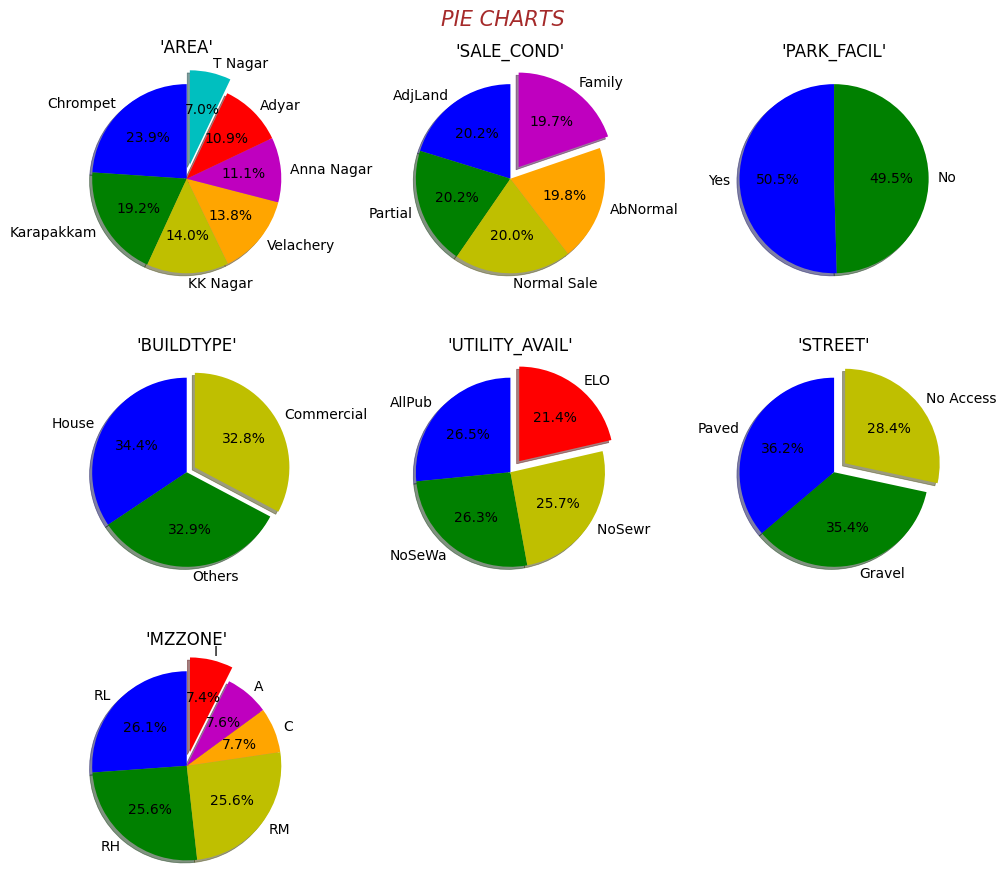

In [1470]:
# Pie Charts w.r.t categorical columns.
fig = plt.figure(figsize=(10,9))
fig.suptitle("PIE CHARTS", fontsize=15,color='brown', 
             style='italic',ha='center', va='bottom')

# Subplot for 'AREA' column.
plt.subplot(331)
plt.title("'AREA'", fontsize=12)
data_area=df["AREA"].value_counts()
ex=[0,0,0,0,0,0,0.15]
clr=["b","g","y","orange","m","r","c"]
label=data_area.index
plt.pie(data_area, startangle = 90, 
        autopct="%1.1f%%",colors=clr,
        explode=ex, shadow = True, labels=label)

# Subplot for 'SALE_COND' column.
plt.subplot(332)
plt.title("'SALE_COND'", fontsize=12, va='top')
data_sc=df["SALE_COND"].value_counts()
ex=[0,0,0,0,0.15]
clr=["b","g","y","orange","m"]
label=data_sc.index
plt.pie(data_sc, startangle = 90, 
        autopct="%1.1f%%",colors=clr,
        explode=ex, shadow = True, labels=label)

# Subplot for 'PARK_FACIL' column.
plt.subplot(333)
plt.title("'PARK_FACIL'", fontsize=12, va='top')
data_pf=df["PARK_FACIL"].value_counts()
clr=["b","g"]
label=data_pf.index
plt.pie(data_pf, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True, labels=label)

# Subplot for 'PARK_FACIL' column.
plt.subplot(334)
plt.title("'BUILDTYPE'", fontsize=12, va='top')
data_bt=df["BUILDTYPE"].value_counts()
clr=["b","g","y"]
label=data_bt.index
plt.pie(data_bt, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True, explode=[0,0,0.1], labels=label)

# Subplot for 'UTILITY_AVAIL' column.
plt.subplot(335)
plt.title("'UTILITY_AVAIL'", fontsize=12, va='top')
data_ua=df['UTILITY_AVAIL'].value_counts()
clr=["b","g","y","r"]
label=data_ua.index
plt.pie(data_ua, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=[0,0,0,0.15], labels=label)

# Subplot for 'STREET' column.
plt.subplot(336)
plt.title("'STREET'", fontsize=12, va='top')
data_street=df['STREET'].value_counts()
clr=["b","g","y"]
label=data_street.index
plt.pie(data_street, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=[0,0,0.15], labels=label)


# Subplot for 'MZZONE' column.
plt.subplot(337)
plt.title("'MZZONE'", fontsize=12, va='top')
data_mzone=df['MZZONE'].value_counts()
clr=["b","g","y","orange","m","r"]
label=data_mzone.index
ex=[0,0,0,0,0,0.15]
plt.pie(data_mzone, autopct="%1.1f%%", startangle = 90,
        colors=clr, shadow = True,explode=ex, labels=label)

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* The Distribution of values in different Categorical columns is shown above. The blue color indicates the value with highest percentage of contribution in that categorical column.
* There is almost an equal distribution of different values in 'SALE_COND', 'PARK_FACIL' and 'BUILDTYPE' columns.

###Distribution plot for columns with continuous values

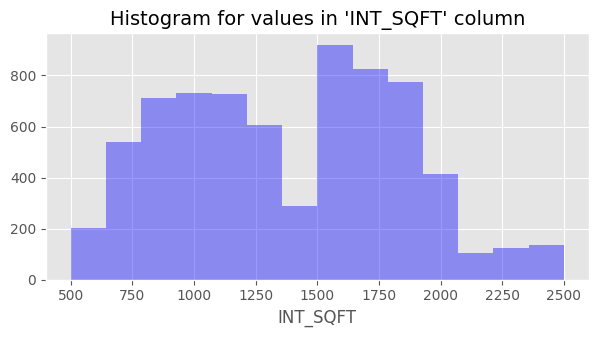

In [1471]:
# Histogram showing distribution of values in 'INT_SQFT' column.
plt.figure(figsize=(7,3.2))
plt.title("Histogram for values in 'INT_SQFT' column",  fontsize=14)
sns.distplot(df['INT_SQFT'], hist=True, kde=False, bins="sturges", color="b")
plt.show()

`Inference From the above graph:`
* The values in 'INT_SQFT' column are NOT Normally distributed.
* Maximum number of observations are seen to occur after 1500 units in 'INT_SQFT' column. 
* There is a decrease in the number of buildings with more than 2000 units in 'INT_SQFT' column.
* There are lesser number of observations for buildings with 'INT_SQFT' ranging from approx 1375 to 1500 units.

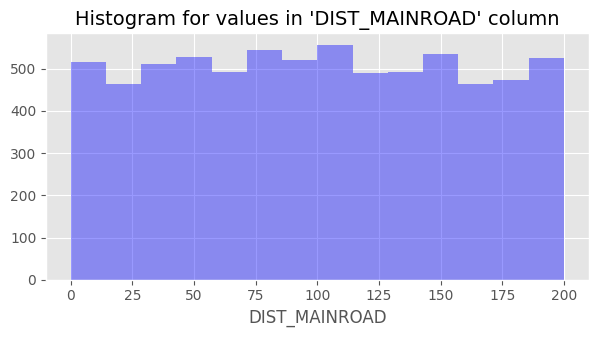

In [1472]:
# Histogram showing distribution of values in 'DIST_MAINROAD' column.
plt.figure(figsize=(7,3.2))
plt.title("Histogram for values in 'DIST_MAINROAD' column",  fontsize=14)
sns.distplot(df['DIST_MAINROAD'], hist=True, kde=False, bins="sturges", color="b")
plt.show()

`Inference From the above graph:`
* The values in 'DIST_MAINROAD' column are NOT Normally distributed, in fact, they are almost uniformly distributed.


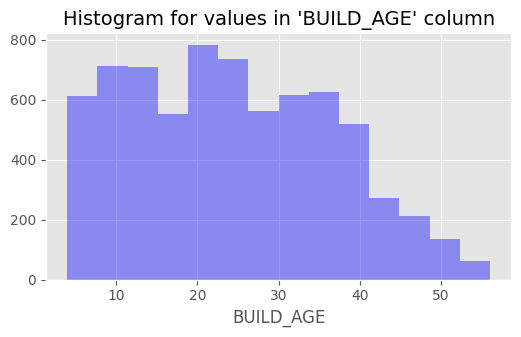

In [1473]:
# Histogram showing distribution of values in 'BUILD_AGE' column.
plt.figure(figsize=(6,3.2))
plt.title("Histogram for values in 'BUILD_AGE' column",  fontsize=14)
sns.distplot(df['BUILD_AGE'], hist=True, kde=False, bins="sturges", color="b")
plt.show()

`Inference From the above graph:`
* The values in 'BUILD_AGE' column are NOT Normally distributed.
* Maximum number of observations are seen to occur at around 20 years.
* Approximately after 38 years of Building the house, there seems to be a decrease in the number of observations. That is, the number of building with more than 38 years of life span is less (decreasing with increase in life span of Building).

### Numerical columns v/s Sales price(Scatter & Bar Plots)

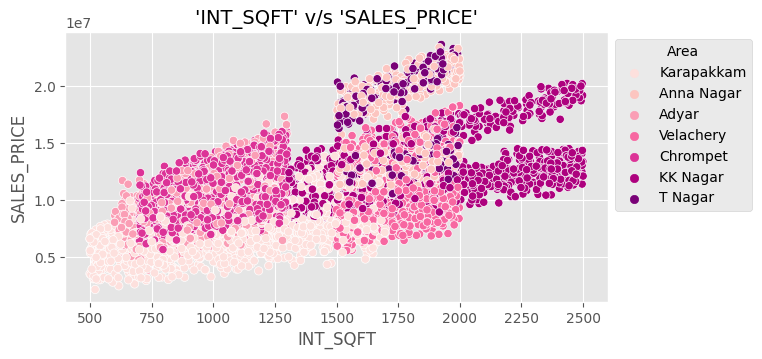

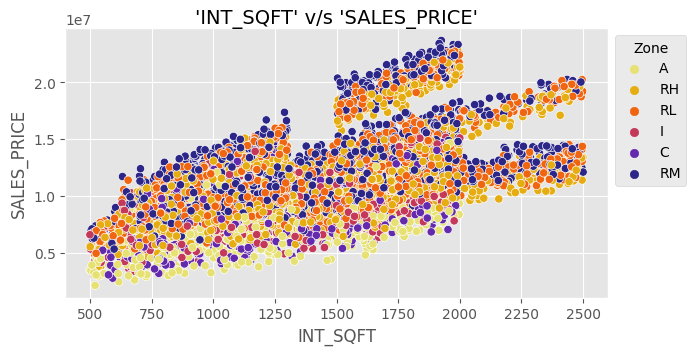

In [1474]:
# Scatterplot between 'INT_SQFT' and 'SALES_PRICE' columns with hue as "AREA" column.
plt.figure(figsize=(7,3.5))
plt.title("'INT_SQFT' v/s 'SALES_PRICE'",  fontsize=14)
sns.scatterplot(x = 'INT_SQFT', y = "SALES_PRICE", hue = "AREA", 
                data=df, palette="RdPu")
plt.legend(title="Area", bbox_to_anchor = (1,1))
plt.show()

# Scatterplot between 'INT_SQFT' and 'SALES_PRICE' columns with hue as "MZZONE" column.
plt.figure(figsize=(7,3.5))
plt.title("'INT_SQFT' v/s 'SALES_PRICE'",  fontsize=14, va="top")
sns.scatterplot(x = 'INT_SQFT', y = "SALES_PRICE", hue = "MZZONE", 
                data=df, palette="CMRmap_r")
plt.legend(title="Zone", bbox_to_anchor = (1,1))
plt.show()

`Inference From the above graph:`
* KK Nagar has the biggest houses.

* The size of the house in T Nagar and Anna Nagar is between 1500 to 2000 sq.ft, but its sales price is the highest when compared to others. This maybe because those areas mainly come under Residential Medium density(RM) zone. Other than zone RM, Residential High and Low density(RH,RL) zones are also coming.

* We can see that Agriculture Zone has buildings ranging from 500 to 2000 sqft, but their sales prices are relatively lesser when compared to other zones.

* There is a clearly a Positive linear relationship between 'INT_SQFT' and 'SALES_PRICE' columns. As the 'INT_SQFT' values increase, the sales price also seems to be increasing.

* Due to the above reason, this feature seems to be an important feature for our model.


In [1475]:
# Correlation Coefficient between 'INT_SQFT' and 'SALES_PRICE' columns.
np.corrcoef(df['INT_SQFT'],df['SALES_PRICE'])[0,1]

0.6121248760738686

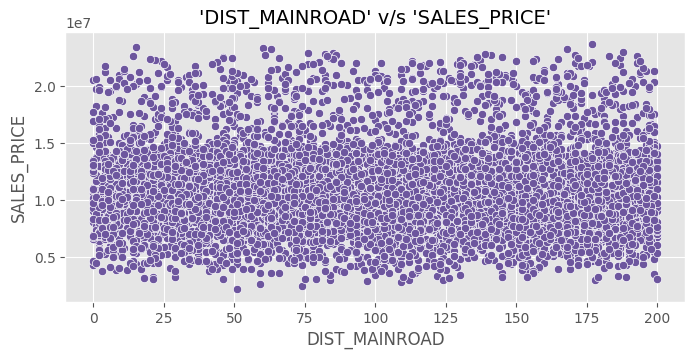

In [1476]:
# Scatterplot between 'DIST_MAINROAD' and 'SALES_PRICE' columns.
plt.figure(figsize=(8,3.5))
plt.title("'DIST_MAINROAD' v/s 'SALES_PRICE'",  fontsize=14)
sns.scatterplot(x = 'DIST_MAINROAD', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()

`Inference From the above graph:`
* There is a clearly NO linear relationship between 'DIST_MAINROAD' and 'SALES_PRICE' columns.
* Due to the above reason, this feature does not seem to be an important for the price prediction.

Since 'N_BEDROOM' is having discrete values we will make Barplot as well.

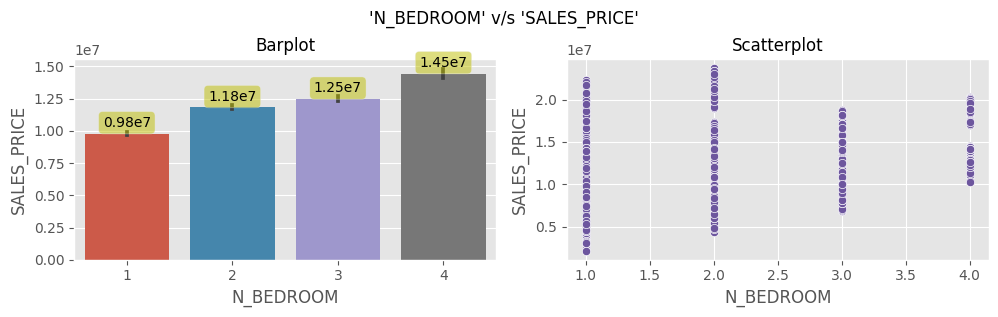

In [1477]:
# Barplot and Scatterplot between 'N_BEDROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(10,3))
fig.suptitle("'N_BEDROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')
# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_BEDROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_BEDROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* There seems to be almost a steady linear increase in the average sales price of the building with increase in the number of Bedrooms.
* Due to the above reason, this feature seems to be an important feature.
* More observations can be seen for Buildings with 1 Bedroom and the range of sales price is also more for it.
* Maximum average sales price occur for buildings with 4 Bedrooms and minimum for buildings with 1 Bedroom.

Since 'N_BATHROOM' is also having discrete values we will make Barplot as well.

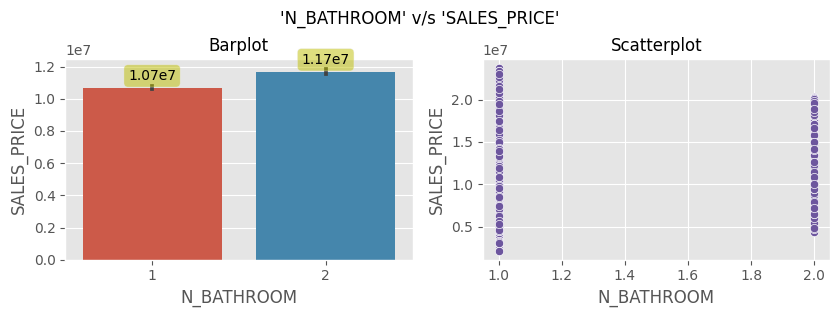

In [1478]:
# Barplot and Scatterplot between 'N_BATHROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(8.5,3))
fig.suptitle("'N_BATHROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_BATHROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_BATHROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* There seems to be almost a steady linear increase in the average sales price of the building with increase in the number of Bathrooms.
* Due to the above reason, this feature seems to be an important feature.
* More observations can be seen for Buildings with 1 Bathroom and the range of sales price is also more for it.

Since 'N_ROOM' is also a discrete feature we will create Barplot for better analysis.

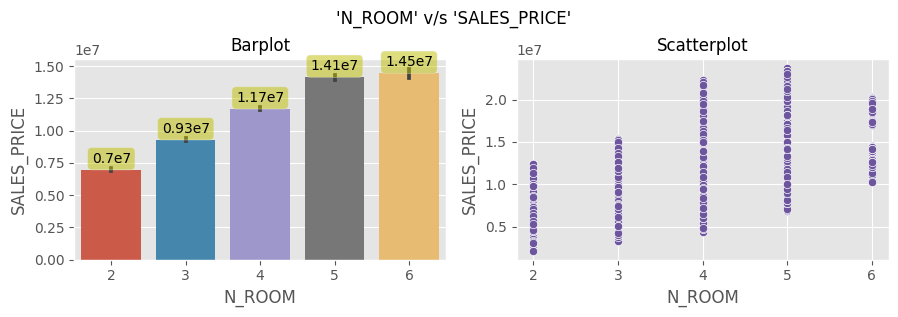

In [1479]:
# Barplot and Scatterplot between 'N_ROOM' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,3))
fig.suptitle("'N_ROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(121)
plt.title("Barplot", fontsize=12)
br8=sns.barplot(x = 'N_ROOM', y = "SALES_PRICE", data=df)
for p in br8.patches:
  br8.annotate(str(round(p.get_height()/10**7,2))+"e7",
              xy=(p.get_x() + p.get_width() / 2, p.get_height()+0.3*10**6),
              ha='center', va='bottom',
              bbox=dict(boxstyle="round", fc="y",alpha=0.5))

# subplot 2: Scatterplot
plt.subplot(122)
plt.title("Scatterplot", fontsize=12)
sns.scatterplot(x = 'N_ROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* There seems to be increase in the average sales price of buildings with increase in the number of rooms. But, the difference between the average sales price of buildings with 5 and 6 rooms seem to be small. As there is no steady increase in the average sales price of the buildings, we cannot say that 'N_ROOM' and 'SALES_PRICE' are having a linear relationship.

* The range of sales price is maximum for Buildings with 4 Rooms.

* Maximum average sales price occur for 6 rooms and minimum average sales price occur for 2 rooms.

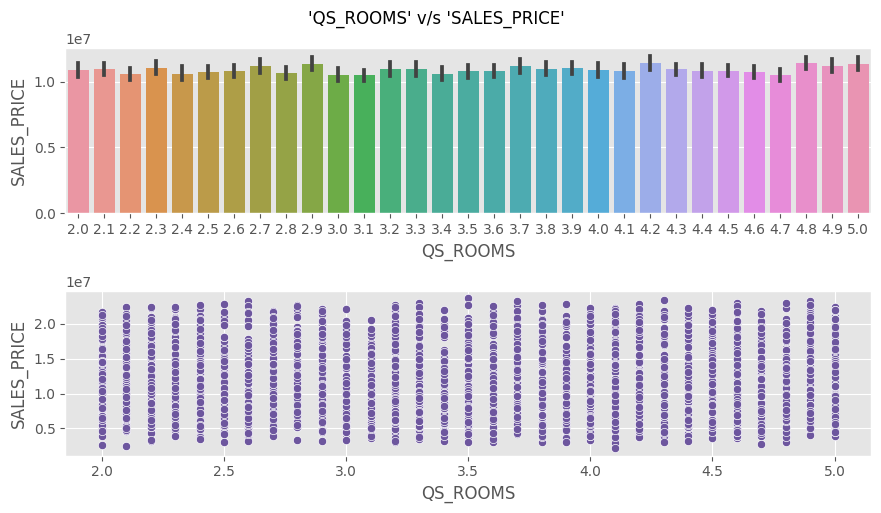

In [1480]:
# Barplot and Scatterplot between 'QS_ROOMS' and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,5))
fig.suptitle("'QS_ROOMS' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_ROOMS', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_ROOMS', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* No specific pattern can be deduced from the above barplot.
* The average selling price is almost the same for all values in 'QS_ROOMS' column. We can deduce from the graph that there is no linear relationship between 'QS_ROOMS' and 'SALES_PRICE' columns.
* The average selling price is in and around 10 Million units for all values in 'QS_ROOMS' column.

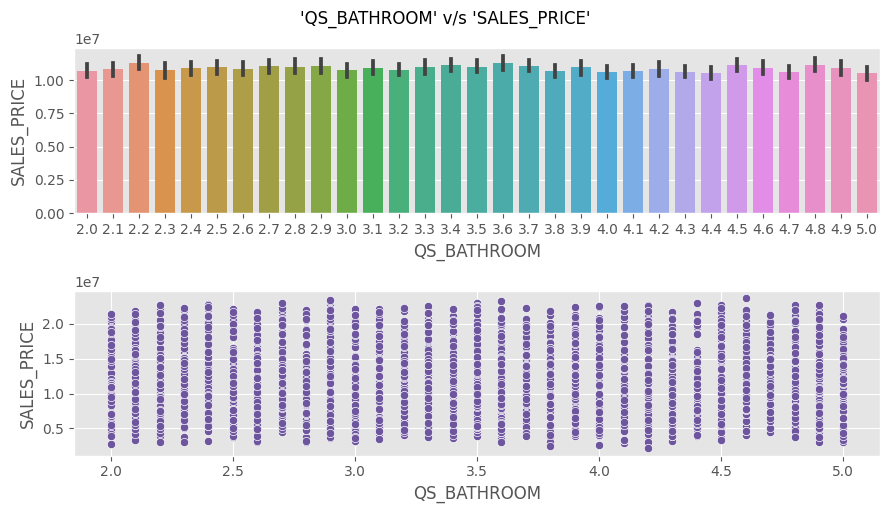

In [1481]:
# Barplot and Scatterplot between 'QS_BATHROOM'  and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,5))
fig.suptitle("'QS_BATHROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_BATHROOM', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_BATHROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* No specific pattern can be deduced from the above barplot.
* The average selling price is almost the same for all values in 'QS_BATHROOM column. We can deduce from the graph that there is no linear relationship between 'QS_BATHROOM' and 'SALES_PRICE' columns.
* The average selling price is just above 10 Million units for all values in 'QS_BATHROOM' column.

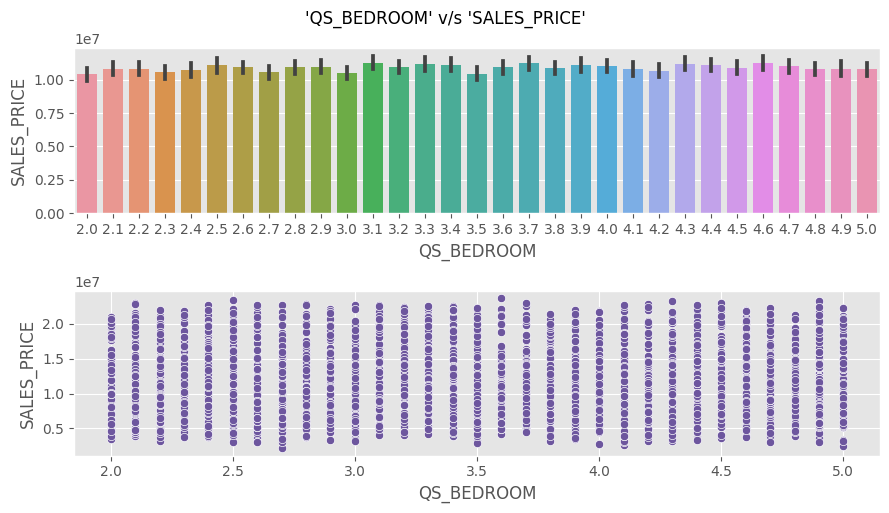

In [1482]:
# Barplot and Scatterplot between 'QS_BEDROOM'  and 'SALES_PRICE' columns.
fig = plt.figure(figsize=(9,5))
fig.suptitle("'QS_BEDROOM' v/s 'SALES_PRICE'",ha='center', va='bottom')

# subplot 1: Barplot
plt.subplot(211)
sns.barplot(x = 'QS_BEDROOM', y = "SALES_PRICE", data=df)

# subplot 2: Scatterplot
plt.subplot(212)
sns.scatterplot(x = 'QS_BEDROOM', y = "SALES_PRICE", data=df, color='#6d569e')

plt.tight_layout()
plt.show()

`Inference From the above graph:`
* No specific pattern can be deduced from the above barplot.
* The average selling price is almost the same for all values in 'QS_BEDROOM' column. We can deduce from the graph that there is no linear relationship between 'QS_BEDROOM' and 'SALES_PRICE' columns.
* The average selling price is in and around 10.125 Million units for all values in 'QS_BEDROOM' column.

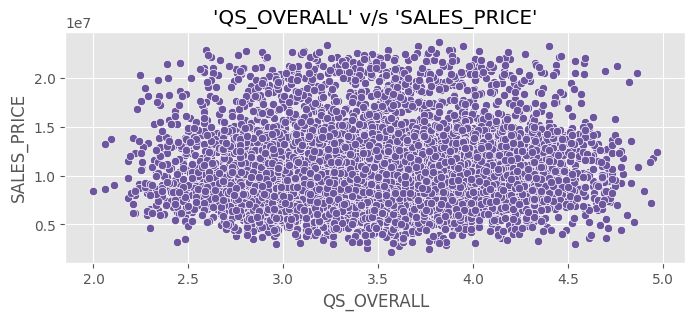

In [1483]:
# Scatterplot between 'QS_OVERALL' and 'SALES_PRICE' columns.
plt.figure(figsize=(8,3))
plt.title("'QS_OVERALL' v/s 'SALES_PRICE'")
sns.scatterplot(x = 'QS_OVERALL', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()

`Inference From the above graph:`
* There is a clearly NO linear relationship between 'QS_OVERALL' and 'SALES_PRICE' columns.
* Due to the above reason, this feature does not seem to be an important for the price prediction.

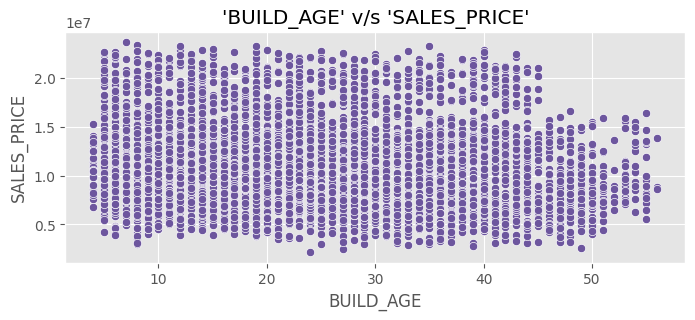

In [1484]:
# Scatterplot between 'BUILD_AGE'  and 'SALES_PRICE' columns.
plt.figure(figsize=(8,3))
plt.title("'BUILD_AGE' v/s 'SALES_PRICE'")
sns.scatterplot(x = 'BUILD_AGE', y = "SALES_PRICE", data=df, color='#6d569e')
plt.show()

`Inference From the above graph:`
* There is a clearly NO linear relationship between 'BUILD_AGE' and 'SALES_PRICE' columns.
* Due to the above reason, this feature does not seem to be an important for the price prediction(For a linear model).

In [1485]:
# Grouping w.r.t 'BUILD_AGE' Column and finding out the sorted mean values of 'SALES_PRICE' Column.
result_build_age=df.groupby(['BUILD_AGE'])["SALES_PRICE"].mean().reset_index().sort_values('BUILD_AGE')
result_build_age.head()

BUILD_AGE   SALES_PRICE
0          4  1.065067e+07
1          5  1.140857e+07
2          6  1.166451e+07
3          7  1.125365e+07
4          8  1.114652e+07

In [1486]:
# while loop to iterete through first 5 intervals to obtain the mean of sales price of the buildings.

# Age of the Building goes from a minimum of 4 years to a maximum of 56 years.
# This is divided into 6 intervals with 9 years gap in between(Except for the last interval whose gap is not equal to 9 years)
sales=[]
i=4
while i!=49:
  sales.append(sum(result_build_age.loc[(result_build_age['BUILD_AGE']>=i)&(result_build_age['BUILD_AGE']<i+9),"SALES_PRICE"]))
  i+=9
sales.append(sum(result_build_age.loc[(result_build_age['BUILD_AGE']>=49)&(result_build_age['BUILD_AGE']<57),"SALES_PRICE"]))
sales

[101674486.82714307,
 100796920.35181326,
 98739412.9470256,
 94172099.85917091,
 90953550.97718437,
 75652629.53058997]

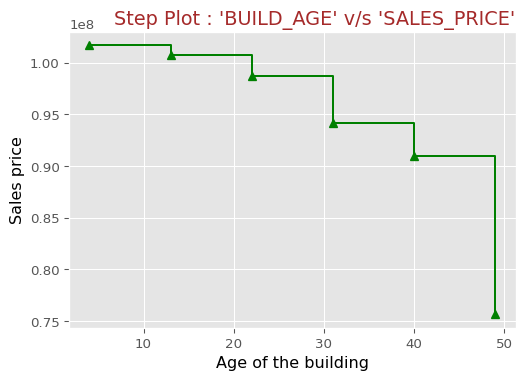

In [1487]:
# The mean of sales price in each interval is plotted.
x_points = [4,13,22,31,40,49]
plt.figure(figsize = (6,4), dpi=96)
plt.title("Step Plot : 'BUILD_AGE' v/s 'SALES_PRICE'",loc="right",color='brown')
plt.xlabel("Age of the building", color="k")
plt.ylabel("Sales price", color="k")
plt.step(x_points, sales, 'g-^', where='post')
plt.show()

`Inference From the above graph:`
* We can see that as the age of the building increases, the sales price is decreasing. So,there might be some relationship between them, but it is not a linear relationship.

###Pie Charts

Count of values in 'N_BEDROOM' column:
1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64



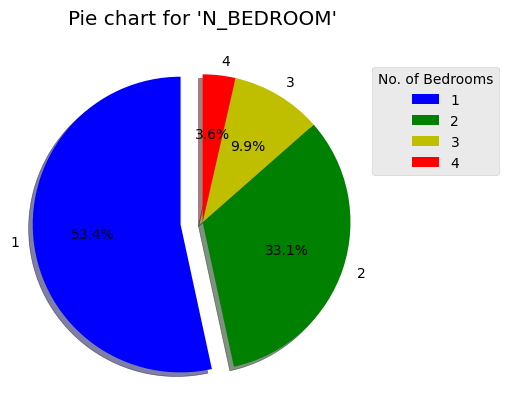

In [1488]:
# Pie chart w.r.t 'N_BEDROOM' column.
data_num_bedroom=df['N_BEDROOM'].value_counts()
print(f"Count of values in 'N_BEDROOM' column:\n{data_num_bedroom}\n")
plt.title("Pie chart for 'N_BEDROOM'",ha='center', va='bottom')
ex=[0.15,0,0,0]
clr=["b","g","y","r"]
label=[1,2,3,4]
plt.pie(data_num_bedroom, startangle = 90, 
        autopct="%1.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Bedrooms", bbox_to_anchor =(0.94,0.94))
plt.show()

`Inference From the above graph:`
* Maximum number of observations/Buildings(more than 50% of total values) are having just 1 Bedroom and the number of buildings with 4 Bedrooms is the minimum(3.6% only).This indicates that buildings with just 1 Bedroom is the most common one.

Count of values in 'N_BATHROOM' column:
1    5594
2    1515
Name: N_BATHROOM, dtype: int64



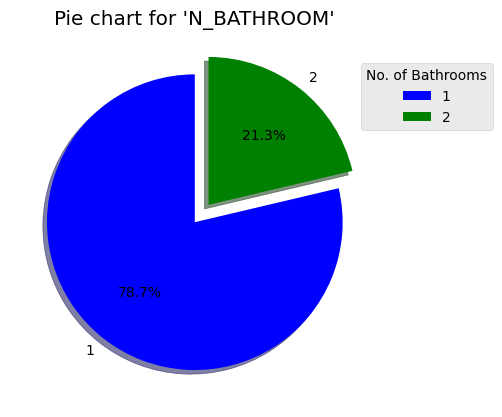

In [1489]:
# Pie chart w.r.t 'N_BATHROOM' column.
data_num_bathroom=df['N_BATHROOM'].value_counts()
print(f"Count of values in 'N_BATHROOM' column:\n{data_num_bathroom}\n")
plt.title("Pie chart for 'N_BATHROOM'",ha='center', va='bottom')
ex=[0,0.15]
clr=["b","g"]
label=[1,2]
plt.pie(data_num_bathroom, startangle = 90, 
        autopct="%1.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Bathrooms",bbox_to_anchor =(0.93,0.95))
plt.show()

`Inference From the above graph:`
* Maximum number of observations/Buildings(almost 80% of total values) are having just 1 Bathroom and the number of buildings with 2 Bedrooms is just about 20% only.This indicates that buildings with just 1 Bathroom is the most common one.

Count of values in 'N_ROOM' column:
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64



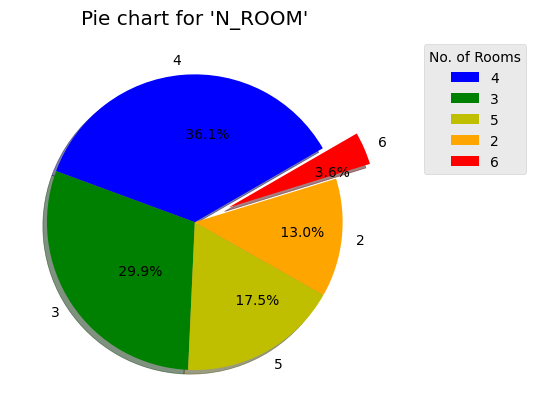

In [1490]:
# Pie chart w.r.t 'N_ROOM' column.
data_num_room=df['N_ROOM'].value_counts()
print(f"Count of values in 'N_ROOM' column:\n{data_num_room}\n")
plt.title("Pie chart for 'N_ROOM'",ha='center', va='bottom')
ex=[0,0,0,0,0.25]
clr=["b","g","y","orange","r"]
label=data_num_room.index
plt.pie(data_num_room, startangle = 30, 
        autopct="%13.1f%%", labels=label,
        colors=clr, explode=ex, shadow = True)
plt.legend(title = "No. of Rooms",bbox_to_anchor =(1.1,1))
plt.show()

`Inference From the above graph:`
* Maximum number of observations/Buildings(almost 36% of total values) are having 4 Rooms and the number of buildings with 6 Rooms is the least one(3.6% only).This indicates that buildings with 4 Rooms is the most common one. Maybe this is because of high number of commercial buildings.

###Label Encoding

We will do Label Encoding for`AREA`,  `SALE_COND`,  `PARK_FACIL`, `UTILITY_AVAIL` and `STREET`columns.

In [1491]:
# Encoding categorical data in 'AREA' column.
df['AREA'] = df['AREA'].map({"Karapakkam":1, "Adyar":2, "Chrompet":3,
                             "Velachery":4, "KK Nagar":5, "Anna Nagar":6,
                             "T Nagar":7})
df['AREA'].value_counts()

3    1702
1    1366
5     997
4     981
6     788
2     774
7     501
Name: AREA, dtype: int64

In [1492]:
# Encoding categorical data in 'SALE_COND' column.
df['SALE_COND'] = df['SALE_COND'].map({"Partial":1, "Family":2, "AbNormal":3,
                             "Normal Sale":4, "AdjLand":5})
df['SALE_COND'].value_counts()

5    1439
1    1433
4    1423
3    1411
2    1403
Name: SALE_COND, dtype: int64

In [1493]:
# Encoding categorical data in 'PARK_FACIL' column.
df['PARK_FACIL'] = df['PARK_FACIL'].map({"Yes":1, "No":0})
df['PARK_FACIL'].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [1494]:
# Encoding categorical data in 'UTILITY_AVAIL' column.
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({"ELO":1, "NoSeWa":2, "NoSewr ":3, "AllPub":4}) # no sewr is 'NoSewr '
df['UTILITY_AVAIL'].value_counts()

4    1887
2    1871
3    1829
1    1522
Name: UTILITY_AVAIL, dtype: int64

In [1495]:
# Encoding categorical data in 'STREET' column.
df['STREET'] = df['STREET'].map({"No Access":1, "Paved":2, "Gravel":3})
df['STREET'].value_counts()

2    2572
3    2520
1    2017
Name: STREET, dtype: int64

### One Hot Encoding

In [1496]:
# List of Categorical columns.
col_to_encode=list(df_cat2.columns)
col_to_encode

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [1497]:
# Removing 'AREA', 'SALE_COND', and 'UTILITY_AVAIL' from above list
label_encoded = ['AREA', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL','STREET']
for i in label_encoded:
  col_to_encode.remove(i)
col_to_encode

['BUILDTYPE', 'MZZONE']

In [1498]:
# One Hot Encoding for the Categorical columns in col_to_encode list.
df_new=pd.get_dummies(df, columns=col_to_encode, drop_first=True)
df_new.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     1      1004 2011-04-05            131          1           1       3   
1     6      1986 2006-12-19             26          2           1       5   
2     2       909 2012-04-02             70          1           1       3   
3     4      1855 2010-03-13             14          3           2       5   
4     1      1226 2009-05-10             84          1           1       3   

   SALE_COND  PARK_FACIL DATE_BUILD  ...  QS_OVERALL  BUILD_AGE  SALES_PRICE  \
0          3           1 1967-05-15  ...       4.330         44      7600000   
1          3           0 1995-12-22  ...       3.765         11     21717770   
2          3           1 1992-09-02  ...       3.090         20     13159200   
3          2           0 1988-03-18  ...       4.010         22      9630290   
4          3           1 1979-10-13  ...       3.290         30      7406250   

   BUILDTYPE_House  BUILDTYPE_Others  MZZONE_C  MZZONE_I  MZZONE_RH  \
0                0                 0         0         0          0   
1                0                 0         0         0          1   
2                0                 0         0         0          0   
3                0                 1         0         1          0   
4                0                 1         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 25 columns]

In [1499]:
# Names of all the columns present in the new Dataframe.
df_new.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'BUILD_AGE', 'SALES_PRICE', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL',
       'MZZONE_RM'],
      dtype='object')

In [1500]:
# Number of rows and columns in the new dataframe.
df_new.shape

(7109, 25)

In [1501]:
# Numerical features in the Dataframe df_new.
df_num= df_new.select_dtypes(include=['int64','float64','uint8'])
features=list(df_num.columns)
features.remove("SALES_PRICE")
features

['AREA',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'BUILD_AGE',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM']

###Heatmap

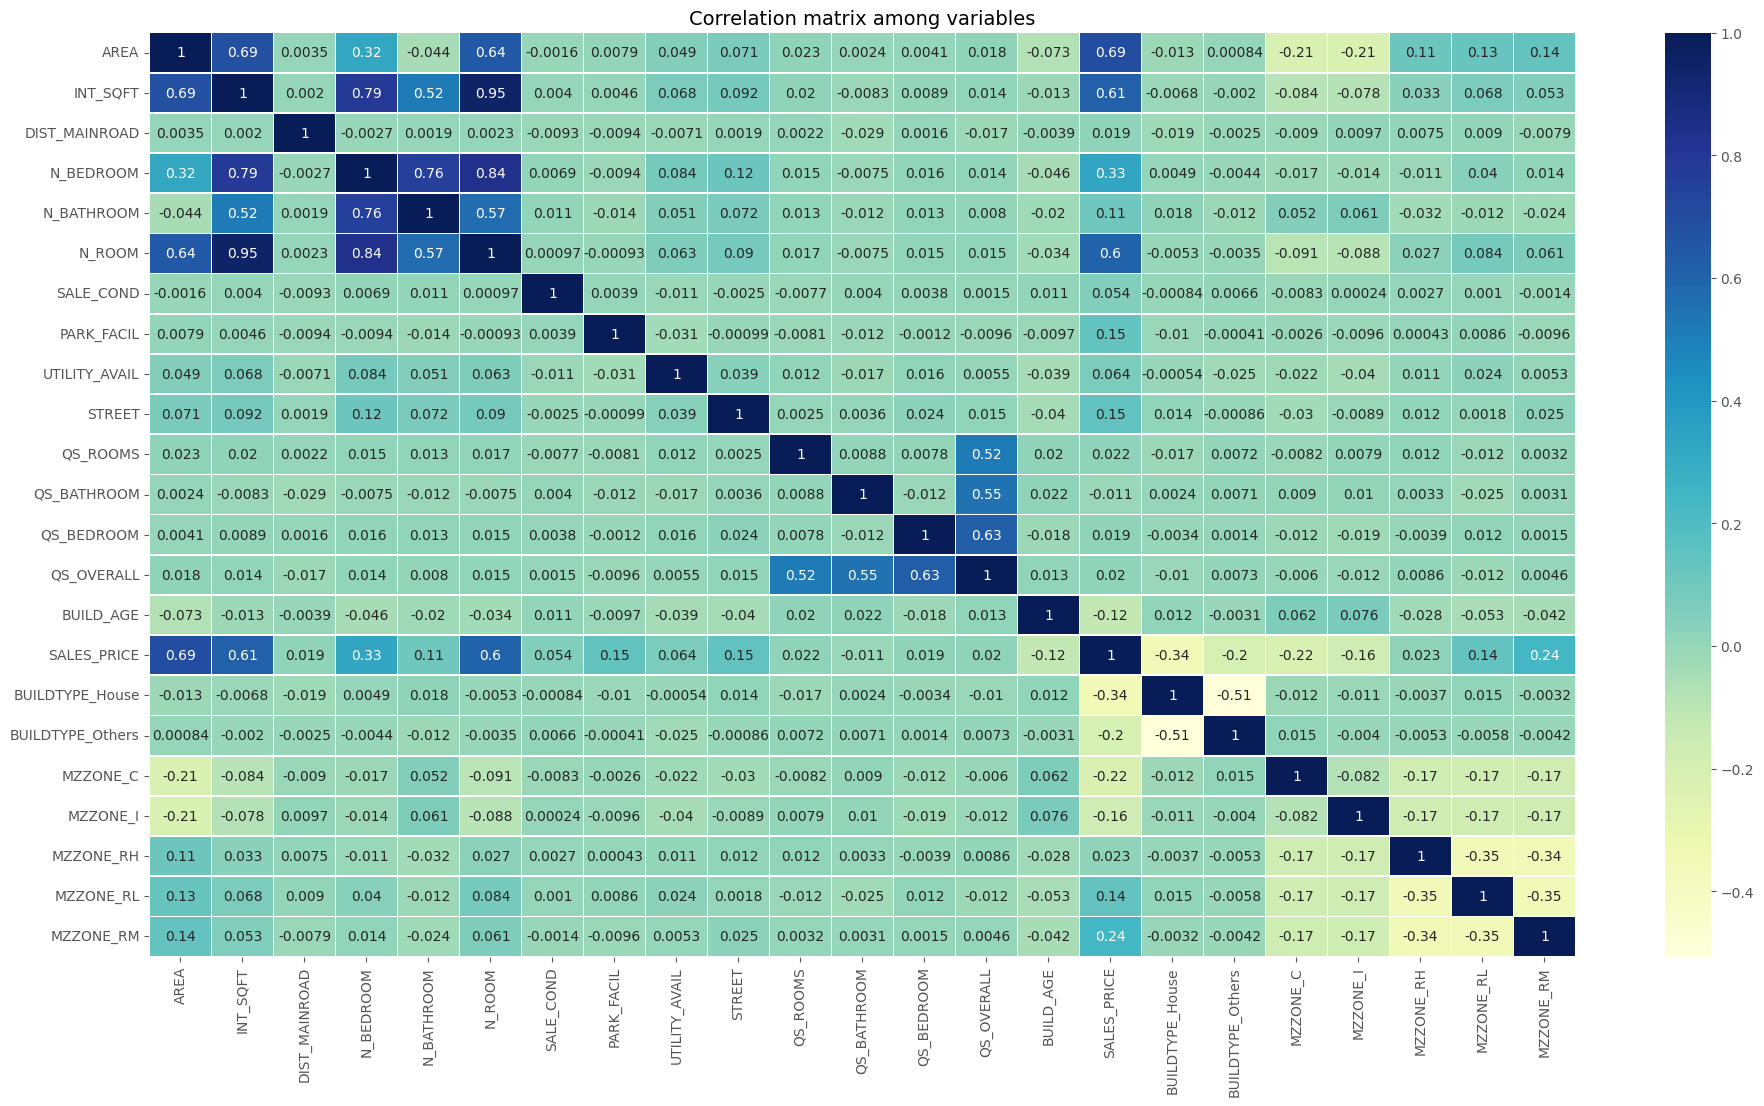

In [1502]:
# Heatmap to observe correlations of numerical columns in df_num.
corr_df = df_num.corr()
plt.figure(figsize=(23,12))
sns.heatmap(corr_df, annot=True, linewidths=0.5,cmap='YlGnBu')
plt.title("Correlation matrix among variables",fontsize=14)
plt.show()

`Inference From the above graph:`
* Many features are not having good correlation coefficient value with the response variable( i.e., many features posses weak or no linear relationship with the output variable).

###Feature Selection(Linear Regression)

In [1503]:
# Python dictionary storing the weak(0.1 and above) to highly correlated features with price and the corresponding correlation values.
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df_new['SALES_PRICE'], df_new[f])[0, 1]
  if (corr_coef >= 0.1) or (corr_coef <= -0.1):
    major_features[f] = corr_coef

print("Number of features weak(0.1 and above) to highly correlated with sales price =",
      len(major_features), "\n")
major_features

Number of features weak(0.1 and above) to highly correlated with sales price = 14 



{'AREA': 0.6941486128515783,
 'BUILDTYPE_House': -0.3449820211861342,
 'BUILDTYPE_Others': -0.20178321646857902,
 'BUILD_AGE': -0.1197695634712397,
 'INT_SQFT': 0.6121248760738686,
 'MZZONE_C': -0.21844113078513175,
 'MZZONE_I': -0.1615806606319729,
 'MZZONE_RL': 0.13746646203258947,
 'MZZONE_RM': 0.23513397561410063,
 'N_BATHROOM': 0.10883438753787143,
 'N_BEDROOM': 0.3309868165825561,
 'N_ROOM': 0.6027596075987967,
 'PARK_FACIL': 0.14642814513891275,
 'STREET': 0.14958917975083127}

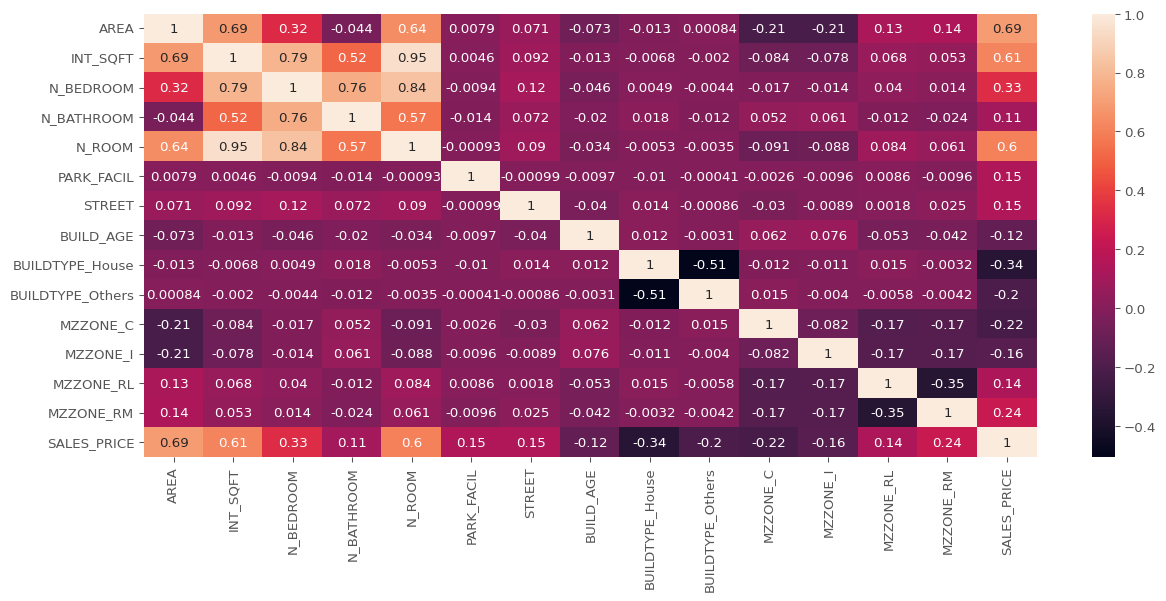

In [1504]:
# Heatmap to visualise the correlation between the above features.
plt.figure(figsize=(15, 6), dpi = 96)
sns.heatmap(df_new[list(major_features.keys())+['SALES_PRICE']].corr(), annot = True)
plt.show()

`Inference From the above graph:`
* 'AREA' column has relatively the highest correlation coefficient value with the response variable.

### Train-Test Split

In [1505]:
# Split the 'df_new' Dataframe into the training and testing datasets.
train_df, test_df = train_test_split(df_new, test_size = 0.33, random_state = 42)

# Separate data-frames for the feature and target variables
X_train = train_df[major_features.keys()]
y_train = train_df['SALES_PRICE']
X_test = test_df[major_features.keys()]
y_test = test_df['SALES_PRICE']

# Shape of X_train,y_train,X_test,y_test.
print("Shape of feature variables of training dataset",X_train.shape)
print("Shape of target variable of training dataset",y_train.shape)
print("Shape of feature variables of testing dataset",X_test.shape)
print("Shape of target variable of testing dataset",y_test.shape)

Shape of feature variables of training dataset (4763, 14)
Shape of target variable of training dataset (4763,)
Shape of feature variables of testing dataset (2346, 14)
Shape of target variable of testing dataset (2346,)


###Feature Scaling or MinMax Scaler

* Generally for linear regression models we do Standard Scaling. But here as 'INT_SQFT' does not follow normal distribution(which is clear from the previous histogram), so we will do Normalization/MinMax Scaler.
* Also we only need to scale this column only.

In [1506]:
# Initialise the Scaler
scaler = MinMaxScaler()
 
# To scale and transform data
X_train['INT_SQFT']=scaler.fit_transform(X_train['INT_SQFT'].values.reshape(-1,1))
X_test['INT_SQFT']=scaler.transform(X_test['INT_SQFT'].values.reshape(-1,1))

# scaled feature - 'INT_SQFT'
X_train['INT_SQFT'].head()

5424    0.676338
6043    0.522761
4942    0.315658
2185    0.631316
5893    0.934967
Name: INT_SQFT, dtype: float64

### Linear Regression(using statsmodels.api and sklearn) and RFE

In [1507]:
# Build a linear regression model using statsmodels.api.
# Add the 'const' column to the features set.
X_train_sm = sm.add_constant(X_train)
sm_lr1 = sm.OLS(y_train, X_train_sm).fit()

# OLS Regression Results
print(sm_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3459.
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        21:20:19   Log-Likelihood:                -73180.
No. Observations:                4763   AIC:                         1.464e+05
Df Residuals:                    4748   BIC:                         1.465e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.463e+06   1.38e+05  

* We can see that there are no warnings for multicollinearity and the p-values for all features, except for 'MZZONE_I' column is less than 0.05.The R-squared is 0.911 and Adj. R-squared is 0.911 which is quite high.
* We will remove the 'MZZONE_I' column as it's p-value is high.

In [1508]:
# Required Features
rqrd_features = list(X_train.columns)
rqrd_features.remove('MZZONE_I')
rqrd_features

['AREA',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'STREET',
 'BUILD_AGE',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'MZZONE_C',
 'MZZONE_RL',
 'MZZONE_RM']

In [1509]:
# Subset the train set such that it contains only the above selected features.
X_train_rfe = X_train[rqrd_features]

# Add the 'const' column to the features set.
X_train_rf = sm.add_constant(X_train_rfe)

# Fit the model with the above selected features.
sm_lr2 = sm.OLS(y_train, X_train_rf).fit()   
print(sm_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3726.
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        21:20:19   Log-Likelihood:                -73180.
No. Observations:                4763   AIC:                         1.464e+05
Df Residuals:                    4749   BIC:                         1.465e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.474e+06   1.37e+05  

* We can see that there are no warnings for multicollinearity and the p-values for all features is less than 0.05.
*  R-squared and Adj. R-squared is equal to 0.911 and 0.910 respectively, which is quite high.

In [1510]:
# Build a linear regression model using the 'sklearn.linear_model' module.
X_train_final = X_train[rqrd_features]
lr = LinearRegression().fit(X_train_final, y_train)
X_test_final = X_test[rqrd_features]

# Predicted y_train and y_test values.
y_train_predict = lr.predict(X_train_final)
y_test_predict = lr.predict(X_test_final)

In [1511]:
# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", lr.score(X_train_final, y_train))
print("Test set accuracy:", lr.score(X_test_final, y_test))

Train set accuracy: 0.9107094706145726
Test set accuracy: 0.9064448392816157


### Model Evaluation

In [1512]:
# User-defined function to evaluate the model.
def model_evaluation(model,X_train_final,X_test_final,y_train,y_test):

  # Training Dataset
  print("Train set")
  print('-' * 40)

  # predicted y_train values.
  y_train_predict = model.predict(X_train_final)
  train_r2score = r2_score(y_train, y_train_predict)
  # formula of adjusted r2 score= 1-[((1-r2score)x(N-1))/(N-p-1)]
  # where N--> Total sample size or No. of rows and p--> No. of predictors/features.
  train_adj_r2score = 1 - ((1 - train_r2score)*(X_train_final.shape[0] - 1))/(X_train_final.shape[0] - X_train_final.shape[1]-1)

  print(f"R-squared = {train_r2score:.3f}")
  print(f"Adjusted R-squared = {train_adj_r2score:.3f}")
  print(f"Mean Absolute Error = {mean_absolute_error(y_train, y_train_predict):.3f}")
  print(f"Mean Squared Error = {mean_squared_error(y_train, y_train_predict):.3f}")
  print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_train, y_train_predict)):.3f}")
  print(f"\nMean squared log error = {mean_squared_log_error(y_train, y_train_predict):.3f}")

  # Testing Dataset
  print("\n\nTest set")
  print('-' * 50)

  y_test_predict = model.predict(X_test_final)
  test_r2_score = r2_score(y_test, y_test_predict)
  test_adj_r2_score = 1 - ((1 - test_r2_score)*(X_test_final.shape[0] - 1))/(X_test_final.shape[0] - X_test_final.shape[1]-1)

  print(f"R-squared = {test_r2_score:.3f}")
  print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
  print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_predict):.3f}")
  print(f"Mean squared error = {mean_squared_error(y_test, y_test_predict):.3f}")
  print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test, y_test_predict)):.3f}")
  print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_predict):.3f}")

model_evaluation(lr,X_train_final,X_test_final,y_train,y_test)    


Train set
----------------------------------------
R-squared = 0.911
Adjusted R-squared = 0.910
Mean Absolute Error = 878392.498
Mean Squared Error = 1296333233132.556
Root Mean Squared Error = 1138566.306

Mean squared log error = 0.015


Test set
--------------------------------------------------
R-squared = 0.906
Adjusted R-squared = 0.906
Mean absolute error = 871142.956
Mean squared error = 1267808165457.545
Root mean squared error = 1125969.878

Mean squared log error = 0.014


`Inference:`
* The R-squared and Adjusted R-squared for both training and testing dataset are quite high.
* The accuracy of training and testing datasets are also good.
* Here the values of MSE,MAE,RMSE are very high. But the Mean squared log error seems to be less.

###Residual Analysis

####Training Dataset

Mean of residuals = 0.000



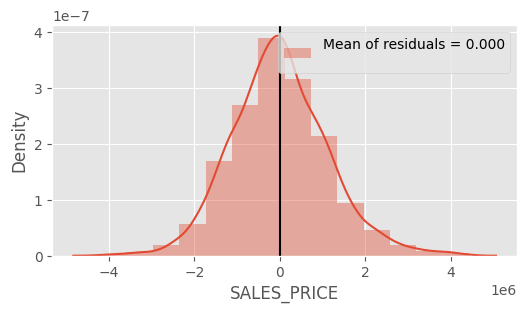

In [1513]:
# User defined function for histogram of the errors obtained in the predicted values.
def hist_residuals(y_actual,y_predicted):
  residuals = y_actual-y_predicted
  print(f"Mean of residuals = {np.mean(residuals):.3f}\n")

  plt.figure(figsize = (6, 3))
  sns.distplot(residuals, bins = 'sturges',
              label = f"Mean of residuals = {np.mean(residuals):.3f}\n")
  plt.axvline(x = np.mean(residuals), color = 'k')
  plt.legend()
  plt.show()

# For the training dataset.
hist_residuals(y_train,y_train_predict)

`Inference From the above graph:`
* Shape of the cure : Bell curve.
* The mean of residuals is zero which is a good thing.

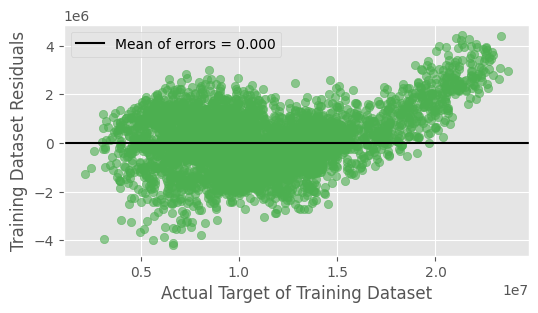

In [1533]:
# Scatter plot between 'train_residuals' and 'y_train'.
train_residuals = y_train - y_train_predict
plt.figure(figsize = (6, 3))
plt.scatter(y_train, train_residuals, color ="#4CAF50", alpha=0.6)
plt.xlabel("Actual Target of Training Dataset")
plt.ylabel("Training Dataset Residuals")
plt.axhline(y = train_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

`Inference From the above graph:`
* The above graph clearly indicates the presence of Heteroscedasticity towards the end i.e., the variance of the residuals in training dataset is unequal.

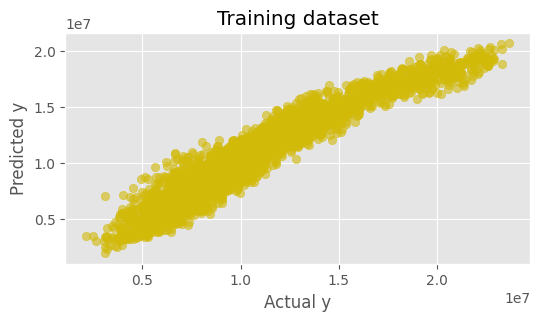

In [1519]:
# Scatter plot for actual values and predictions of the training dataset.
plt.figure(figsize = (6, 3))
plt.title('Training dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_train, y_train_predict, color="#d2ba09", alpha=0.6)
plt.show()

`Inference From the above graph:`
* This scatter plot between the actual and predicted prices almost follow a straight line which suggests the predicted prices are quite close to the actual prices.  

####Testing Dataset

Mean of residuals = -80895.956



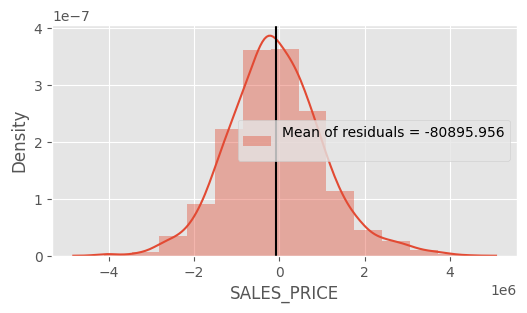

In [1520]:
# Histogram for the errors obtained in the predicted values for the test set.
hist_residuals(y_test,y_test_predict)

`Inference From the above graph:`
* Shape of the cure : Bell curve.
* The mean of residuals should have been zero,but unfortunately it  is a huge value and not equal to zero.

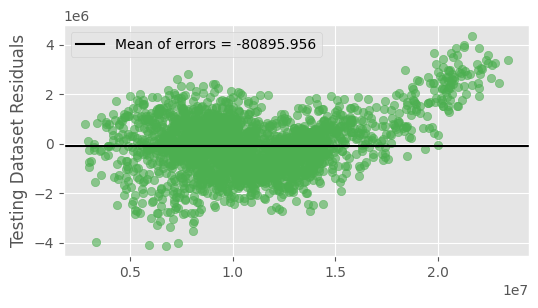

In [1534]:
# Scatter plot between 'test_residuals' and 'y_test'.
plt.figure(figsize = (6, 3))
test_residuals = y_test - y_test_predict
plt.scatter(y_test, test_residuals, color ="#4CAF50", alpha=0.6)
plt.ylabel("Testing Dataset Residuals")
plt.axhline(y = test_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {test_residuals.mean():.3f}')
plt.legend()
plt.show()

`Inference From the above graph:`
* The above graph clearly indicates the presence of Heteroscedasticity towards the end i.e., the variance of the residuals in testing dataset is unequal.

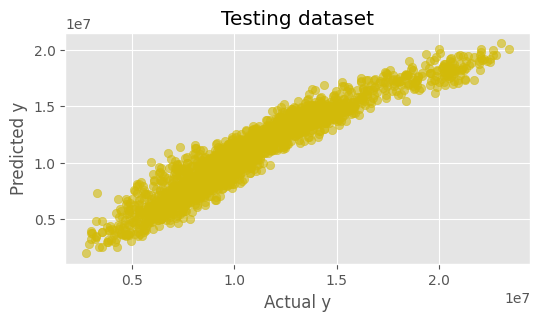

In [1522]:
# Scatter plot for actual values and predictions of the testing dataset.
plt.figure(figsize = (6, 3))
plt.title('Testing dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_test, y_test_predict, color="#d2ba09", alpha=0.6)
plt.show()

`Inference From the above graph:`
*  This scatter plot between the actual and predicted prices of testing dataset almost follow a straight line which suggests the predicted prices are quite close to the actual prices. 
* But the errors observed were very high and there was presence of Heteroscedasticity.
* Due to the above reasons `linear regression seems to be an average to good model for Chennai house price prediction problem`.



In [1523]:
# Standard deviation of the actual values in testing dataset.
std_actual = y_test.std()
std_actual

3682014.3610142875

####Range of predicted Chennai house prices

In [1524]:
# Range of Predicted values of House.
pred_range_lr = pd.DataFrame()
pred_range_lr["Actual Price"] = y_test
pred_range_lr["Predicted Price"] = y_test_predict
pred_range_lr["Lower Limit Of Predicted Price"] = y_test_predict - std_actual
pred_range_lr["Higher Limit Of Predicted Price"] = y_test_predict + std_actual
pred_range_lr.index = np.arange(len(y_test))
pred_range_lr.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.242473e+07                    8.742715e+06   
1       7524750     7.676044e+06                    3.994030e+06   
2      16434500     1.730474e+07                    1.362272e+07   
3       6705750     6.349632e+06                    2.667618e+06   
4      15831550     1.488539e+07                    1.120337e+07   

   Higher Limit Of Predicted Price  
0                     1.610674e+07  
1                     1.135806e+07  
2                     2.098675e+07  
3                     1.003165e+07  
4                     1.856740e+07

###Lasso Regression with Cross-validation

We’ll use the LassoCV() function from sklearn to fit the lasso regression model and we will also use the RepeatedKFold() function to perform k-fold cross-validation to find the optimal alpha value to use for the penalty term.

In [1525]:
# Seperating features and target in the df_new dataframe.
X=df_num.drop("SALES_PRICE", axis=1)
y=df_num["SALES_PRICE"]

#Splitting into training and testing  datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1) 
# cv=number of folds to be considered while applying cross-validation

# Fit the Lasso model.
lasso_cv.fit(X_train, y_train)

# Create the model score.
print(lasso_cv.score(X_train, y_train),'\n')

# Display lambda value which produced the lowest test MSE
print(f'alpha: {lasso_cv.alpha_}\n')

# Make predictions.
y_pred1_test = lasso_cv.predict(X_test)
y_pred1_test[:10]

0.9247351858938933 

alpha: 0.0



array([13086867.91954854,  7719535.00921477, 16806027.11556245,
        6768864.45504749, 15099602.94464351,  9620877.73554836,
        6520569.01793935, 14207921.32943489, 14521731.66147562,
       17593791.96721476])

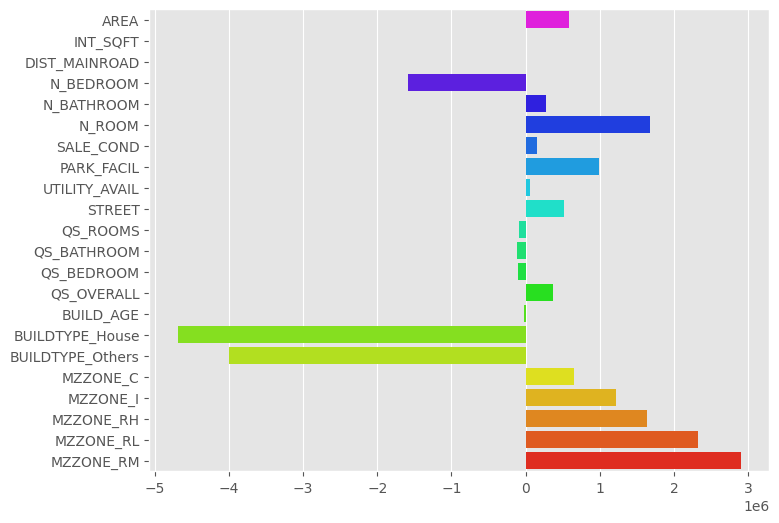

In [1526]:
# Plotting the coefficient score.
plt.figure(figsize = (8, 6))
sns.barplot( lasso_cv.coef_, X_train.columns, palette="gist_rainbow_r", orient="h")
plt.show()

In [1527]:
# Model Evaluation
model_evaluation(lasso_cv,X_train,X_test,y_train,y_test)    

Train set
----------------------------------------
R-squared = 0.925
Adjusted R-squared = 0.924
Mean Absolute Error = 796880.089
Mean Squared Error = 1092705805227.468
Root Mean Squared Error = 1045325.693

Mean squared log error = 0.012


Test set
--------------------------------------------------
R-squared = 0.921
Adjusted R-squared = 0.920
Mean absolute error = 783915.619
Mean squared error = 1069339078077.751
Root mean squared error = 1034088.525

Mean squared log error = 0.012


The R-squared and Adjusted R-squared for both training and testing datasets are pretty good and MSLE is less for both.

Mean of residuals = 0.000



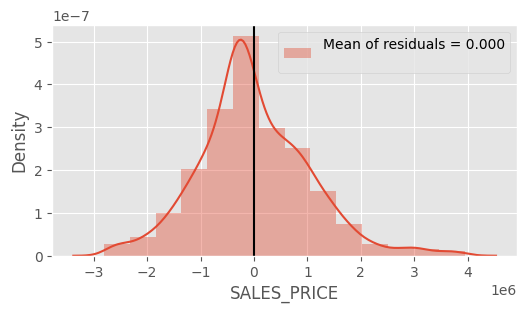




Mean of residuals = -85655.990



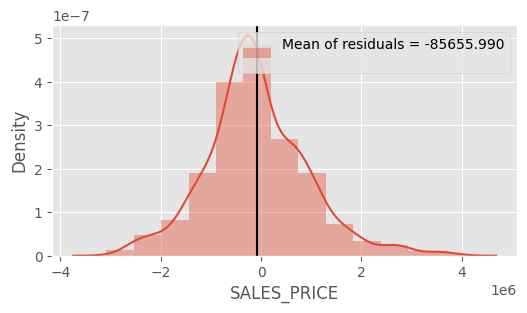

In [1528]:
# Histogram for the errors obtained in the predicted values for the train set.
y_pred1_train = lasso_cv.predict(X_train)
hist_residuals(y_train,y_pred1_train)
# Histogram for the errors obtained in the predicted values for the test set.
print("\n\n")
hist_residuals(y_test,y_pred1_test)

`Inference From the above graph:`
* The mean of residuals of training dataset is 0 and that of testing dataset is NOT zero, which is not good.

Training Dataset:



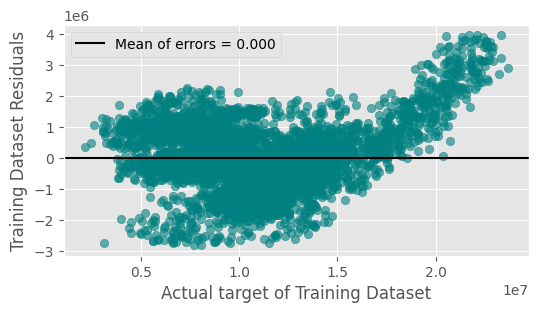



Testing Dataset:



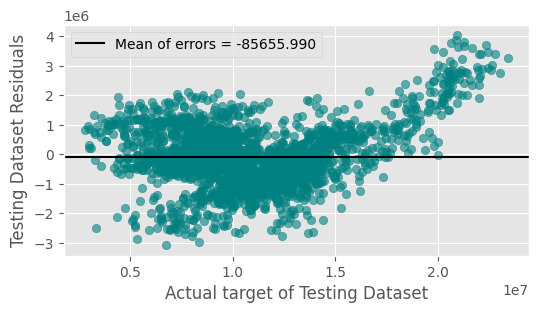

In [1532]:
# Scatter plot between 'train_residuals' and 'y_train'.
print("Training Dataset:\n")
plt.figure(figsize = (6, 3))
train_residuals = y_train - y_pred1_train
plt.scatter(y_train, train_residuals, color="teal", alpha=0.6)
plt.xlabel("Actual target of Training Dataset")
plt.ylabel("Training Dataset Residuals")
plt.axhline(y = train_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

# Scatter plot between 'test_residuals' and 'y_test'.
print("\n\nTesting Dataset:\n")
plt.figure(figsize = (6, 3))
test_residuals = y_test - y_pred1_test
plt.scatter(y_test, test_residuals, color="teal", alpha=0.6)
plt.xlabel("Actual target of Testing Dataset")
plt.ylabel("Testing Dataset Residuals")
plt.axhline(y = test_residuals.mean(), color = 'k', 
            label = f'Mean of errors = {test_residuals.mean():.3f}')
plt.legend()
plt.show()

`Inference From the above graph:`
* Both the graphs are almost following homoscedasticity to some extent.Uniform variance can be observed except at the end where there is a change.

Training Dataset:



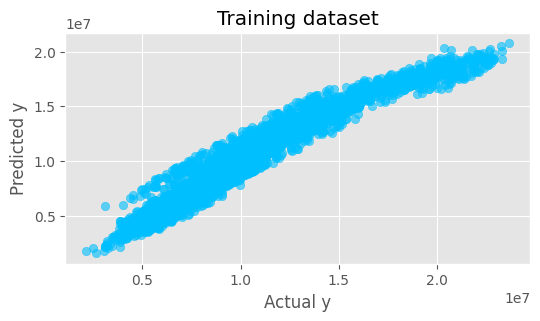



Testing Dataset:



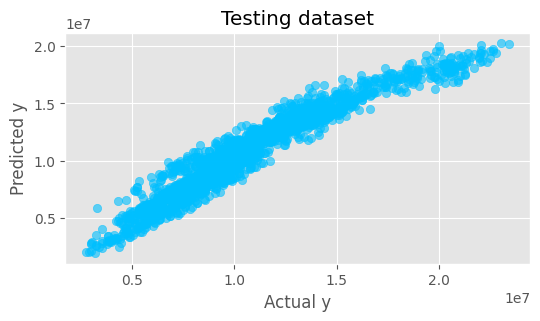

In [1535]:
# Scatter plot for actual values and predictions of the training dataset.
print("Training Dataset:\n")
plt.figure(figsize = (6, 3))
plt.title('Training dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_train, y_pred1_train, color="#00bfff", alpha=0.6)
plt.show()

# Scatter plot for actual values and predictions of the testing dataset.
print("\n\nTesting Dataset:\n")
plt.figure(figsize = (6, 3))
plt.title('Testing dataset')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.scatter(y_test, y_pred1_test, color="#00bfff", alpha=0.6)
plt.show()

`Inference From the above graph:`
* For both training and testing datasets the scatter plot between the actual and predicted prices follows a straight line which suggests that the predicted prices are very close to the actual prices of the house.

*  Due to this reason `Lasso Regression seems to be a good model for Chennai house price prediction problem`.


####Range of predicted Chennai house prices

In [1536]:
# Range of Predicted values of House.
pred_range_lasso = pd.DataFrame()
pred_range_lasso["Actual Price"] = y_test
pred_range_lasso["Predicted Price"] = y_pred1_test
pred_range_lasso["Lower Limit Of Predicted Price"] = y_pred1_test - std_actual
pred_range_lasso["Higher Limit Of Predicted Price"] = y_pred1_test + std_actual
pred_range_lasso.index = np.arange(len(y_test))
pred_range_lasso.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.308687e+07                    9.404854e+06   
1       7524750     7.719535e+06                    4.037521e+06   
2      16434500     1.680603e+07                    1.312401e+07   
3       6705750     6.768864e+06                    3.086850e+06   
4      15831550     1.509960e+07                    1.141759e+07   

   Higher Limit Of Predicted Price  
0                     1.676888e+07  
1                     1.140155e+07  
2                     2.048804e+07  
3                     1.045088e+07  
4                     1.878162e+07

###KNeighborsRegressor Model

####ExtraTreesRegressor for feature selection

Model Report
MSE: 0.0
CV Score: 258298369278.9909


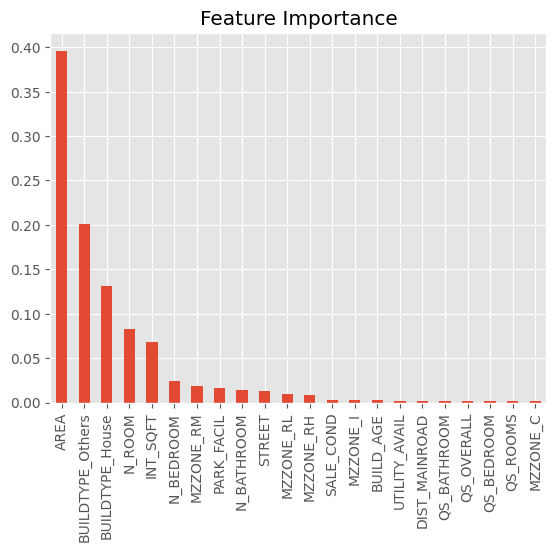

In [1537]:
# Building ExtraTreesRegressor Model for feature selection. We will provide those features to build KNN Regression model.
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [1538]:
# Taking the top 3 features 
features_rqrd=pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)[:3].index
features_rqrd

Index(['AREA', 'BUILDTYPE_Others', 'BUILDTYPE_House'], dtype='object')

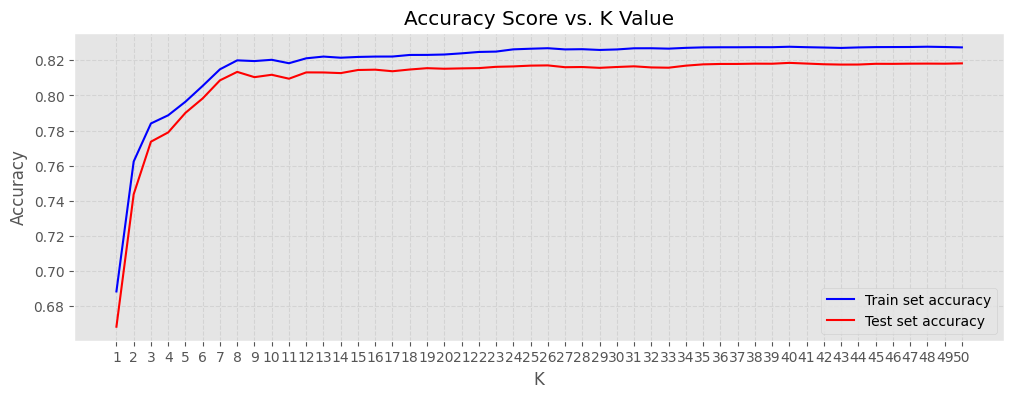

In [1540]:
# Plot accuracy scores of train and test sets for 1 to 20 neighbours.
# Make lists to store train and test accuracy scores.
acc_train = []
acc_test= []

# Loop over for a range of 20 to get the accuracy scores
for k in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train[features_rqrd], y_train)
    acc_train.append(knn.score(X_train[features_rqrd], y_train))
    acc_test.append(knn.score(X_test[features_rqrd], y_test))

# Plot Train and Test accuracy scores
plt.figure(figsize = (12, 4))
plt.grid()
plt.xticks(range(1, 51, 1))
plt.plot(range(1, 51), acc_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 51), acc_test, color= 'red', label = "Test set accuracy")      
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(color="lightgrey", linestyle="--")
plt.show()

In [1541]:
# Cross-checking the optimal parameters using GridSearchCV.
parameters = { "n_neighbors": range(1, 50),
              "weights": ["uniform", "distance"] }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train[features_rqrd], y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [1542]:
# Best Parameters for KNN Regression model using GridSearchCV.
gridsearch.best_params_

{'n_neighbors': 48, 'weights': 'uniform'}

In [1543]:
#Train kNN regressor model for 'k = 48'.
knn_new = KNeighborsRegressor(n_neighbors = 48, weights = 'uniform')
knn_new.fit(X_train[features_rqrd], y_train)

# Perform prediction using 'predict()' function.
y_train_pred_knn = knn_new.predict(X_train[features_rqrd])
y_test_pred_knn = knn_new.predict(X_test[features_rqrd])

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn_new.score(X_train[features_rqrd], y_train))
print("Test set accuracy:", knn_new.score(X_test[features_rqrd], y_test))

Train set accuracy: 0.8277179268679533
Test set accuracy: 0.818105773493649


In [1544]:
# Evaluate kNN regressor using RMSE, MAE and MSLE values
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_knn)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_knn):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_knn):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_knn)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_knn):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_knn):.3f}")

Train Set
--------------------------------------------------
Root mean squared error(RMSE): 1581523.586
Mean Absolute Error(MAE): 1271553.958
Mean Squared Log Error(MSLE): 0.029


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 1570009.770
Mean Absolute Error(MAE): 1264988.708
Mean Squared Log Error(MSLE): 0.030


`Inference:` We can see that the KNN Regression model has quite low MSLE and accuracy seems to be good(not great) as well.

####Range of predicted Chennai house prices

In [1545]:
# Range of Predicted values of House.
pred_range_knn = pd.DataFrame()
pred_range_knn["Actual Price"] = y_test
pred_range_knn["Predicted Price"] = y_test_pred_knn
pred_range_knn["Lower Limit Of Predicted Price"] = y_test_pred_knn - std_actual
pred_range_knn["Higher Limit Of Predicted Price"] = y_test_pred_knn + std_actual
pred_range_knn.index = np.arange(len(y_test))
pred_range_knn.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.120147e+07                    7.519458e+06   
1       7524750     6.192198e+06                    2.510184e+06   
2      16434500     1.583069e+07                    1.214867e+07   
3       6705750     6.192198e+06                    2.510184e+06   
4      15831550     1.451654e+07                    1.083453e+07   

   Higher Limit Of Predicted Price  
0                     1.488349e+07  
1                     9.874212e+06  
2                     1.951270e+07  
3                     9.874212e+06  
4                     1.819856e+07

###Decision Tree Model

In [1546]:
# Building a Decision Tree Regressor Model.
dtr = DecisionTreeRegressor(max_depth=8,random_state=3)
# Fit dtr to the training dataset.
dtr.fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred_tree = dtr.predict(X_train)
y_test_pred_tree = dtr.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", dtr.score(X_train, y_train))
print("Test set accuracy:", dtr.score(X_test, y_test))

Train set accuracy: 0.9619374767038031
Test set accuracy: 0.942933986102224


In [1547]:
# Evaluate Decision Tree Regressor Model using RMSE, MAE and MSLE values
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_tree)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_tree):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_tree):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_tree)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_tree):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_tree):.3f}")

Train Set
--------------------------------------------------
Root mean squared error(RMSE): 743368.949
Mean Absolute Error(MAE): 568552.451
Mean Squared Log Error(MSLE): 0.008


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 879390.291
Mean Absolute Error(MAE): 691974.697
Mean Squared Log Error(MSLE): 0.011


`Inference:` The Mean Squared Log Error(MSLE) is less.

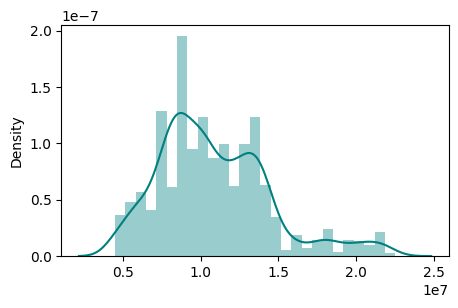

In [1548]:
# Histogram of predicted values of target.
plt.figure(figsize=(5,3))
plt.style.use("default")
sns.distplot(y_test_pred_tree, color="teal")
plt.show()

`Inference From the above graph:`
* We are not getting a perfect bell curve.

Note: Good bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

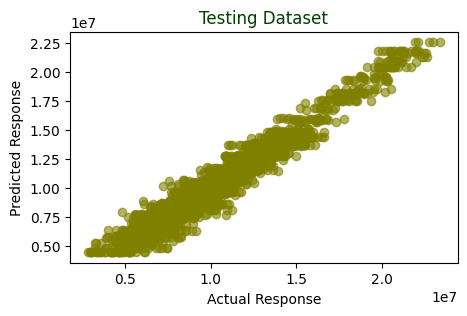

In [1549]:
# Scatter plot between actual and predicted values of target.
plt.figure(figsize=(5,3))
plt.title("Testing Dataset", color="#003f00")
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.scatter(y_test,y_test_pred_tree, color="olive",alpha=0.6)
plt.show()

`Inference From the above graph:`
* The scatter plot between the actual and predicted prices follows almost a straight line which suggests the predicted prices are closer to the actual prices.  


In [1550]:
# Gridsearch to find the best parameters for our decision tree model

# Hyper parameters range intialization for tuning
tree_params = {"criterion": ["mse", "mae"],
               "max_depth":  np.arange(2, 10),
               "max_features": range(2, 21),
               'min_samples_split' : np.arange(5, 10),
               'min_samples_leaf' : np.arange(5, 10),
               'random_state': [20]}

tuning_model = GridSearchCV(dtr, param_grid=tree_params,cv=3, n_jobs=-1, verbose=True)

tuning_model.fit(X_train, y_train)

# Best hyperparameters 
tuning_model.best_params_

Fitting 3 folds for each of 7600 candidates, totalling 22800 fits


{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 19,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'random_state': 20}

In [1551]:
# Best model score
tuning_model.best_score_

0.9379085571041855

In [1552]:
# Training Decision Tree With Best Hyperparameters
tree_model_final= DecisionTreeRegressor(criterion='mse', max_depth=9,
                                        max_features=19, min_samples_leaf=6,
                                        min_samples_split=5, random_state=20)
tree_model_final.fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred_tree_final = tree_model_final.predict(X_train)
y_test_pred_tree_final = tree_model_final.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", tree_model_final.score(X_train, y_train))
print("Test set accuracy:", tree_model_final.score(X_test, y_test))

Train set accuracy: 0.9704002960409281
Test set accuracy: 0.9455143369483318


`Inference:` After tuning the accuracy of both training and testing datasets are slightly increasing(Training more than Testing).

In [1553]:
# Evaluate Decision Tree Regressor Model(after Hyperparameter Tuning) using RMSE, MAE and MSLE values
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_tree_final)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_tree_final):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_tree_final):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_tree_final)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_tree_final):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_tree_final):.3f}")

Train Set
--------------------------------------------------
Root mean squared error(RMSE): 655540.174
Mean Absolute Error(MAE): 502729.846
Mean Squared Log Error(MSLE): 0.006


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 859278.643
Mean Absolute Error(MAE): 660535.134
Mean Squared Log Error(MSLE): 0.010


`Inference:` After tuning there is slight decrease in all the errors calculated(For both training and testing dataset)

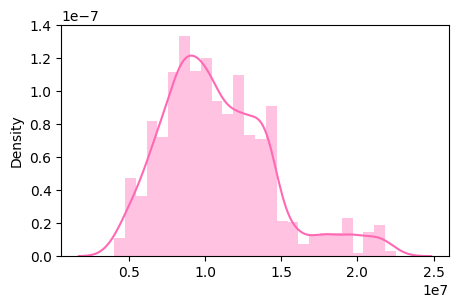

In [1554]:
# Histogram of predicted values of target.
plt.figure(figsize=(5,3))
sns.distplot(y_test_pred_tree_final, color="hotpink")
plt.show()

`Inference From the above graph:`
 
* We are getting a better graph when compared to the previous one.

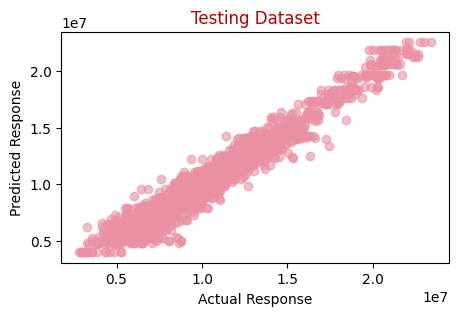

In [1555]:
# Scatter plot between actual and predicted values of target.
plt.figure(figsize=(5,3))
plt.title("Testing Dataset", color="#b30000")
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.scatter(y_test,y_test_pred_tree_final,color="#e991a2", alpha=0.6)
plt.show()

`Inference From the above graph:`
* The scatter plot between the actual and predicted prices follows almost a straight line which suggests the predicted prices are closer to the actual prices.  
* We are getting a better graph when compared to the previous one.

####Range of predicted Chennai house prices

In [1556]:
# Range of Predicted values of House.
pred_range_tree = pd.DataFrame()
pred_range_tree["Actual Price"] = y_test
pred_range_tree["Predicted Price"] = y_test_pred_tree_final
pred_range_tree["Lower Limit Of Predicted Price"] = y_test_pred_tree_final - std_actual
pred_range_tree["Higher Limit Of Predicted Price"] = y_test_pred_tree_final + std_actual
pred_range_tree.index = np.arange(len(y_test))
pred_range_tree.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.295497e+07                    9.272958e+06   
1       7524750     6.784750e+06                    3.102736e+06   
2      16434500     1.707632e+07                    1.339431e+07   
3       6705750     6.784750e+06                    3.102736e+06   
4      15831550     1.496244e+07                    1.128043e+07   

   Higher Limit Of Predicted Price  
0                     1.663699e+07  
1                     1.046676e+07  
2                     2.075834e+07  
3                     1.046676e+07  
4                     1.864446e+07

###Random Forest Regressor

In [1557]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [1558]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
                               n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# n_iter--> number of different combinations to try
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [1559]:
# Best parameters from fitting the random search.
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [1560]:
# Training Random Forest Regressor Model With Best Hyperparameters.
rfr_tuned = RandomForestRegressor(bootstrap = True, max_depth = 15,
                                  max_features = 'auto', min_samples_leaf = 2,
                                  min_samples_split = 5, n_estimators = 100)
rfr_tuned.fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred_rfr = rfr_tuned.predict(X_train)
y_test_pred_rfr = rfr_tuned.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", rfr_tuned.score(X_train, y_train))
print("Test set accuracy:", rfr_tuned.score(X_test, y_test))

Train set accuracy: 0.994928874511922
Test set accuracy: 0.9771544583621035


The accuracy scores for both training ad testing datasets are very high.

In [1561]:
# Evaluate Random Forest Regressor Model using RMSE, MAE and MSLE values.
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_rfr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_rfr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_rfr):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_rfr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_rfr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_rfr):.3f}")

Train Set
--------------------------------------------------
Root mean squared error(RMSE): 271336.243
Mean Absolute Error(MAE): 202778.918
Mean Squared Log Error(MSLE): 0.001


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 556408.335
Mean Absolute Error(MAE): 426124.355
Mean Squared Log Error(MSLE): 0.005



`Inference:` Mean squared log error is quite low for both training and testing datasets.

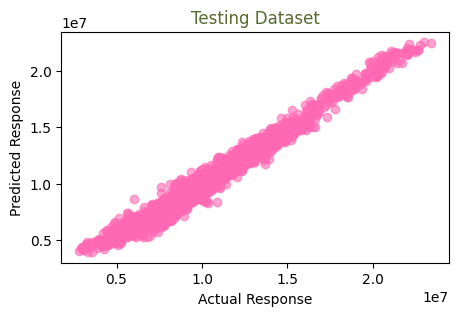

In [1563]:
# Scatter plot between actual and predicted values of target.
plt.figure(figsize=(5,3))
plt.title("Testing Dataset", color="#556b2f")
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.scatter(y_test,y_test_pred_rfr,color="hotpink", alpha=0.6)
plt.show()

`Inference From the above graph:`
*  The scatter plot between the actual and predicted prices follows almost a straight line which suggests the predicted prices are closer to the actual prices.

####Range of predicted Chennai house prices

In [1564]:
# Range of Predicted values of House.
pred_range_rfr = pd.DataFrame()
pred_range_rfr["Actual Price"] = y_test
pred_range_rfr["Predicted Price"] = y_test_pred_rfr
pred_range_rfr["Lower Limit Of Predicted Price"] = y_test_pred_rfr - std_actual
pred_range_rfr["Higher Limit Of Predicted Price"] = y_test_pred_rfr + std_actual
pred_range_rfr.index = np.arange(len(y_test))
pred_range_rfr.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200     1.306010e+07                    9.378091e+06   
1       7524750     7.180212e+06                    3.498197e+06   
2      16434500     1.697027e+07                    1.328825e+07   
3       6705750     6.654535e+06                    2.972520e+06   
4      15831550     1.511615e+07                    1.143414e+07   

   Higher Limit Of Predicted Price  
0                     1.674212e+07  
1                     1.086223e+07  
2                     2.065228e+07  
3                     1.033655e+07  
4                     1.879817e+07

###XGBoost Regressor

####HyperParameter Tuning — Hyperopt Bayesian Optimization for Xgboost 

In [1565]:
# Step 1: Define the space over which hyperopt will search for optimal hyperparameters.

#Import 'scope' from hyperopt in order to obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
space = {
        "max_depth": scope.int(hp.quniform("max_depth", 2, 21, 1)),
        'n_estimators':hp.choice('n_estimators', np.arange(200, 5000, 10, dtype=int)),
        'eta':hp.quniform('eta', 0.01, 0.3, 0.1),
        'max_featuers': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
        'objective':'reg:squarederror',
        'eval_metric': "rmse",
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split': hp.uniform('min_samples_split', 0, 1) 
        }
        
    

In [1566]:
# Step 2: Define the hyperopt objective function
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(**space)
    
    # Define evaluation datasets.
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    # Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
    model.fit(X_train, y_train, eval_set=evaluation,
              verbose=False, early_stopping_rounds=10, eval_metric="rmse",)
    
    # Obtain prediction and rmse score.
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False) # if squared = False, it returns RMSE.
    print("SCORE:", rmse)
    
    # Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}   

In [1567]:
# Step 3: Optimization algorithm
trials = Trials() # Trials - This is the 'database' which stores the completed hyper-parameters and the score.

best_hyperparams = fmin(fn = hyperparameter_tuning,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
180413.0070184945
SCORE:
180413.0070184945
SCORE:
272995.3208245368
SCORE:
332390.88279145054
SCORE:
341727.3213969289
SCORE:
272995.3208245368
SCORE:
292295.0830822988
SCORE:
346448.593245974
SCORE:
322299.7297855323
SCORE:
174447.33658894192
SCORE:
348367.9399102498
SCORE:
292295.0830822988
SCORE:
341506.0058362082
SCORE:
180413.0070184945
SCORE:
180413.0070184945
SCORE:
341506.0058362082
SCORE:
165950.16018724802
SCORE:
346448.593245974
SCORE:
341727.3213969289
SCORE:
346903.0327185637
SCORE:
165950.16018724802
SCORE:
223018.4333190405
SCORE:
223018.4333190405
SCORE:
165950.16018724802
SCORE:
233549.24891775908
SCORE:
233549.24891775908
SCORE:
165950.16018724802
SCORE:
204895.13342390736
SCORE:
258640.79416885076
SCORE:
349183.3599038377
SCORE:
167273.14662127316
SCORE:
204895.13342390736
SCORE:
332390.88279145054
SCORE:
383104.0742399972
SCORE:
167273.14662127316
SCORE:
273632.62688670703
SCORE:
204895.13342390736
SCORE:
322299.7297855323
SCORE:
233549.24891775908
SCORE:
340

In [1568]:
# Best hyperparameters obtained(optimal parameters that best fit the XGBoost Regressor model & better loss function value)
print("The best hyperparameters are :\n")
print(best_hyperparams)

The best hyperparameters are :

{'eta': 0.0, 'max_depth': 3.0, 'max_features': 3, 'min_samples_leaf': 0.4796713789930546, 'min_samples_split': 0.9593383148452455, 'n_estimators': 354}


In [1570]:
# Building and fitting the XGBoost Regression Model using the best parameters.
xgr = xgb.XGBRegressor(objective='reg:squarederror',
                       min_samples_leaf = 0.4796713789930546,
                       min_samples_split = 0.9593383148452455,
                       eta = 0.0, max_depth = 3, max_features = 3,
                       min_child_weight = 0, n_estimators = 354,
                       subsample = 0.9, eval_metric='rmse').fit(X_train, y_train)

# Perform prediction using 'predict()' function.
y_train_pred_xgr = xgr.predict(X_train)
y_test_pred_xgr = xgr.predict(X_test)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", xgr.score(X_train, y_train))
print("Test set accuracy:", xgr.score(X_test, y_test))

Train set accuracy: 0.9954800785543674
Test set accuracy: 0.9935388377922878


`Inference:` So far the XGBoost Regression Model has given the best results with very high accuracy for both testing and training datasets,

In [1571]:
# Evaluate XGBoost Regression Model using RMSE, MAE and MSLE values.
print(f"Train Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_train, y_train_pred_xgr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_train, y_train_pred_xgr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_train, y_train_pred_xgr):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"Root mean squared error(RMSE): {np.sqrt(mean_squared_error(y_test, y_test_pred_xgr)):.3f}")
print(f"Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_test_pred_xgr):.3f}")
print(f"Mean Squared Log Error(MSLE): {mean_squared_log_error(y_test, y_test_pred_xgr):.3f}")

Train Set
--------------------------------------------------
Root mean squared error(RMSE): 256165.755
Mean Absolute Error(MAE): 184111.502
Mean Squared Log Error(MSLE): 0.001


Test Set
--------------------------------------------------
Root mean squared error(RMSE): 295902.217
Mean Absolute Error(MAE): 216066.886
Mean Squared Log Error(MSLE): 0.001


`Inference:` Mean Squared Log Error(MSLE) for both training and testing datasets are quite low(0.001).

`Note`: matplotlib.rcParams is a matplotlib.RcParams object, it is a dictionary-like variable which store some rc settings in matplotlib. We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.

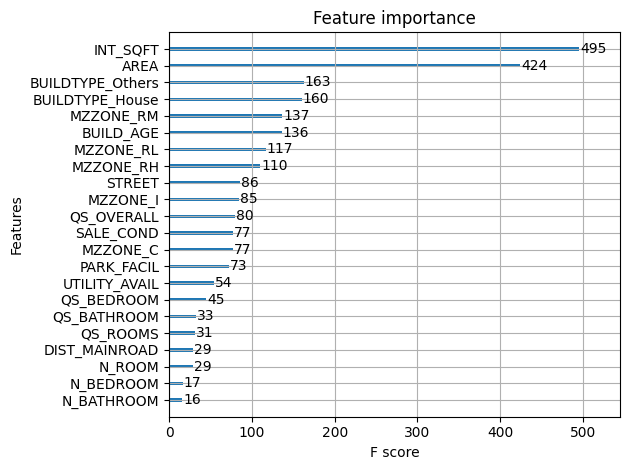

In [1572]:
# Examining the importance of each feature column in the original dataset within the model by plotting the feature importances.
xgb.plot_importance(xgr)
plt.rcParams['figure.figsize'] = [9, 5] # set figure size
plt.tight_layout()
plt.show()

`Inference From the above graph:`
* Here, we are counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear.
* As we can see, 'INT_SQFT' column has been given the highest importance score among all the features. Thus, XGBoost also gives you a way to do Feature Selection.  

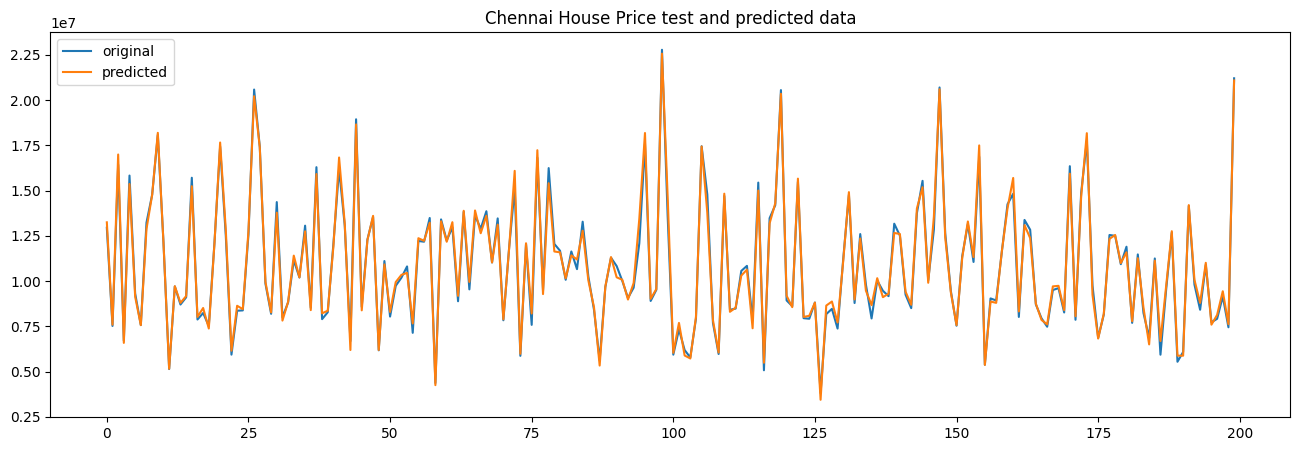

In [1573]:
# Visualizing the original and predicted values of testing dataset in a plot to compare visually.
# Plotted only the 1st 200 values for better visualization.
plt.figure(figsize=(16,5))
x_ax = range(200)
plt.plot(x_ax, y_test[:200], label="original")
plt.plot(x_ax, y_test_pred_xgr[:200], label="predicted")
plt.title("Chennai House Price test and predicted data")
plt.legend()
plt.show()

`Inference From the above graph:`
* We can see that the actual y values and predicted y values for the testing dataset is almost overlapping each other.
* This indicates that the difference between actual and predicted values are minimum.

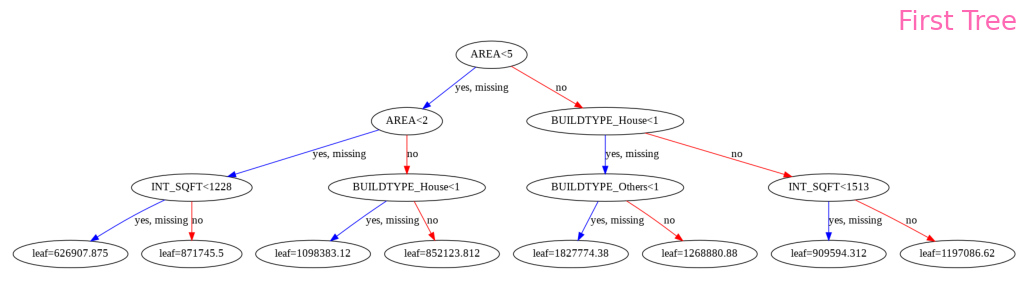

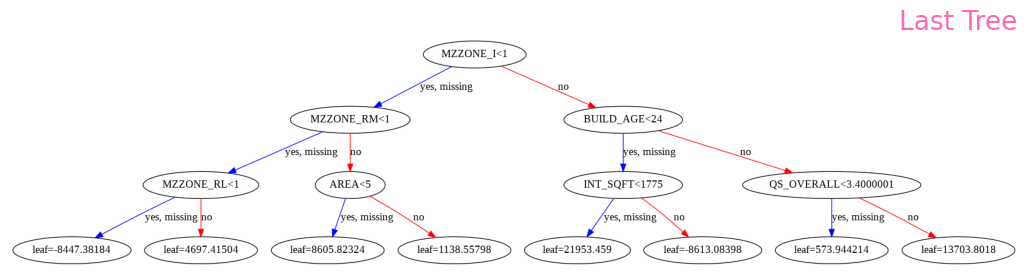

In [1574]:
# Plotting the first tree
fig, ax = plt.subplots(figsize=(13, 13))
ax.set_title("First Tree", color="hotpink", loc="right",fontsize=19)
xgb.plot_tree(xgr, num_trees=0, ax=ax)
plt.show()

# Plotting the last tree
fig, ax = plt.subplots(figsize=(13, 13))
ax.set_title("Last Tree", color="hotpink", loc="right",fontsize=19)
xgb.plot_tree(xgr, num_trees=132, ax=ax)
plt.show()

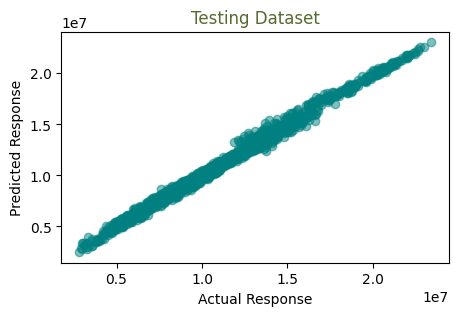

In [1575]:
# Scatter plot between actual and predicted values of target.
plt.figure(figsize=(5,3))
plt.title("Testing Dataset", color="#556b2f")
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")
plt.scatter(y_test,y_test_pred_xgr, color = 'teal', alpha=0.5)
plt.show()

`Inference From the above graph:` 
* We are almost getting a perfect staright line which indicates that the difference between actual and predicted values are very less.

* This helps us in concluding that `XGBoost Regression Model can be considered as the best model for predicting Chennai house prices`.

####Range of predicted Chennai house prices

In [1576]:
# Range of Predicted values of House.
pred_range_xgbr = pd.DataFrame()
pred_range_xgbr["Actual Price"] = y_test
pred_range_xgbr["Predicted Price"] = y_test_pred_xgr
pred_range_xgbr["Lower Limit Of Predicted Price"] = y_test_pred_xgr - std_actual
pred_range_xgbr["Higher Limit Of Predicted Price"] = y_test_pred_xgr + std_actual
pred_range_xgbr.index = np.arange(len(y_test))
pred_range_xgbr.head()

Actual Price  Predicted Price  Lower Limit Of Predicted Price  \
0      12948200       13248270.0                      9566256.00   
1       7524750        7596184.0                      3914169.75   
2      16434500       16994278.0                     13312264.00   
3       6705750        6589282.5                      2907268.25   
4      15831550       15364538.0                     11682524.00   

   Higher Limit Of Predicted Price  
0                       16930284.0  
1                       11278198.0  
2                       20676292.0  
3                       10271297.0  
4                       19046552.0

##Final Thoughts:

* Out of all the models deployed, XGBoost Regression Model gave the best results in predicting Chennai house prices. The accuracy of the model was very high and also the predicted values were very close to the actual values of houses.